In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px

## 폰트
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
age = pd.read_csv("거래내역(매출내역)_나이대.csv")
sex = pd.read_csv("거래내역(매출내역)_성별.csv")

In [4]:
age

,Unnamed: 0,cstmr_nw_zp,gn_cd,sale_dv_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt,counts
0,1,1002,20,5,9998,기타전문점,300,1
1,2,1002,20,9,4010,편 의 점,11140,1
2,3,1002,20,9,4121,구내매점(국가기관등),20423,1
3,4,1002,25,9,1123,택시,19400,1
4,5,1002,30,5,9998,기타전문점,600,4
...,...,...,...,...,...,...,...,...
75278,75279,8866,50,5,9998,기타전문점,7457,5
75279,75280,8866,50,9,4020,슈퍼 마켓,35913,1
75280,75281,8866,55,5,4020,슈퍼 마켓,95177,1
75281,75282,8866,60,5,9998,기타전문점,300,1


In [5]:
sex

,Unnamed: 0,cstmr_nw_zp,sex_cd,sale_dv_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt,counts
0,1,1002,0,5,9140,공공 요금,3530,1
1,2,1002,0,5,9153,이동통신요금,71153,1
2,3,1002,0,5,9998,기타전문점,29107,15
3,4,1002,0,9,1123,택시,19400,1
4,5,1002,0,9,4010,편 의 점,11140,1
...,...,...,...,...,...,...,...,...
41742,41743,8866,0,5,4010,편 의 점,39417,9
41743,41744,8866,0,5,9998,기타전문점,58933,5
41744,41745,8866,1,5,4020,슈퍼 마켓,95177,1
41745,41746,8866,1,5,9998,기타전문점,101691,7


# 성별

In [7]:
sex['cstmr_nw_zp']= sex['cstmr_nw_zp'].apply(lambda x: str(x))

In [8]:
sex['nw_zp']= sex['cstmr_nw_zp'].apply(lambda x : x[0:2])

In [9]:
sex

,Unnamed: 0,cstmr_nw_zp,sex_cd,sale_dv_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt,counts,nw_zp
0,1,1002,0,5,9140,공공 요금,3530,1,10
1,2,1002,0,5,9153,이동통신요금,71153,1,10
2,3,1002,0,5,9998,기타전문점,29107,15,10
3,4,1002,0,9,1123,택시,19400,1,10
4,5,1002,0,9,4010,편 의 점,11140,1,10
...,...,...,...,...,...,...,...,...,...
41742,41743,8866,0,5,4010,편 의 점,39417,9,88
41743,41744,8866,0,5,9998,기타전문점,58933,5,88
41744,41745,8866,1,5,4020,슈퍼 마켓,95177,1,88
41745,41746,8866,1,5,9998,기타전문점,101691,7,88


In [10]:
df1 = sex[['nw_zp','sex_cd','mer_tpbuz_cd','tpbuz_nm','sale_amt']]

In [11]:
df1

,nw_zp,sex_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt
0,10,0,9140,공공 요금,3530
1,10,0,9153,이동통신요금,71153
2,10,0,9998,기타전문점,29107
3,10,0,1123,택시,19400
4,10,0,4010,편 의 점,11140
...,...,...,...,...,...
41742,88,0,4010,편 의 점,39417
41743,88,0,9998,기타전문점,58933
41744,88,1,4020,슈퍼 마켓,95177
41745,88,1,9998,기타전문점,101691


In [12]:
df1_0 = df1[df1['sex_cd']==0]
df1_1 = df1[df1['sex_cd']==1]

In [20]:
df1_0_sum = df1_0.groupby(['sex_cd','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df1_0_sum.sort_values(by=['sale_amt'], axis=0).head(10) # 남성 지역구분 없이 매출 하위 10위 업종

,sex_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt
54,0,9120,보관창고업,2833
2,0,2002,스포츠레져용품,3767
35,0,5201,컴 퓨 터,4547
7,0,2250,영화관,4667
55,0,9130,사무서비스,6480
22,0,4099,기타유통업,12314
36,0,6140,주 차 장,15767
5,0,2130,노래방,16484
3,0,2101,골프경기장,20667
10,0,3199,기타전기제품,20967


In [21]:
df1_0_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10) # 남성 지역구분 없이 매출 상위 10위 업종

,sex_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt
18,0,4076,인터넷 P/G,923338669
68,0,9998,기타전문점,569775518
59,0,9153,이동통신요금,543112510
15,0,4010,편 의 점,226796464
16,0,4020,슈퍼 마켓,113558139
14,0,4004,대형할인점,78060957
1,0,1123,택시,76356090
25,0,4121,구내매점(국가기관등),42416352
19,0,4077,인터넷종합Mall,36955862
20,0,4078,인터넷Mall,36343873


In [22]:
df1_1_sum = df1_1.groupby(['sex_cd','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df1_1_sum.sort_values(by=['sale_amt'], axis=0).head(10) # 여성 지역구분 없이 매출 하위 10위 업종

,sex_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt
36,1,5201,컴 퓨 터,1116
60,1,9121,화물 운송,2400
37,1,5210,통신 기기,3133
4,1,2130,노래방,3667
38,1,6140,주 차 장,3867
21,1,4099,기타유통업,6200
48,1,8004,일식회집,8167
6,1,2251,티켓,15767
45,1,7105,안경,24000
67,1,9199,기타용역서비스,27000


In [23]:
df1_1_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10) # 여성 지역구분 없이 매출 상위 10위 업종

,sex_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt
17,1,4076,인터넷 P/G,1422800245
73,1,9998,기타전문점,660244691
65,1,9153,이동통신요금,556538154
14,1,4020,슈퍼 마켓,214160994
18,1,4077,인터넷종합Mall,137722302
12,1,4004,대형할인점,114889119
13,1,4010,편 의 점,74263012
1,1,1123,택시,62610287
19,1,4078,인터넷Mall,41786207
35,1,5123,유아원,29011111


In [24]:
df1

,nw_zp,sex_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt
0,10,0,9140,공공 요금,3530
1,10,0,9153,이동통신요금,71153
2,10,0,9998,기타전문점,29107
3,10,0,1123,택시,19400
4,10,0,4010,편 의 점,11140
...,...,...,...,...,...
41742,88,0,4010,편 의 점,39417
41743,88,0,9998,기타전문점,58933
41744,88,1,4020,슈퍼 마켓,95177
41745,88,1,9998,기타전문점,101691


In [38]:
df1_1_SUM = df1_1.groupby(['nw_zp','sex_cd','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df1_0_SUM = df1_0.groupby(['nw_zp','sex_cd','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()

In [95]:
temp_0 = pd.DataFrame(index=range(0,len(set(df1['nw_zp']))),columns = ['nw_zp','남성'])
n=0
for i in sorted(set(df1['nw_zp'])):
    temp_list = [np.nan]
    tmp0 = df1_0_SUM[df1_0_SUM['nw_zp']==i]
    tmp1 = df1_1_SUM[df1_1_SUM ['nw_zp']==i]
    tmp0_0 = tmp0.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
    tmp1_1 = tmp1.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
    temp_list.append(list(tmp0_0['tpbuz_nm']))
    temp_0.iloc[n,:] = temp_list
    n += 1
    temp_0['nw_zp']= sorted(set(df1['nw_zp']))

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [96]:
temp_0

,nw_zp,남성
0,10,"[기타전문점, 인터넷 P/G, 이동통신요금, 편 의 점, 택시]"
1,11,"[인터넷 P/G, 이동통신요금, 기타전문점, 슈퍼 마켓, 편 의 점]"
2,12,"[기타전문점, 이동통신요금, 편 의 점, 슈퍼 마켓, 인터넷 P/G]"
3,13,"[기타전문점, 이동통신요금, 인터넷 P/G, 편 의 점, 슈퍼 마켓]"
4,14,"[기타전문점, 인터넷 P/G, 이동통신요금, 편 의 점, 농협하나로클럽]"
...,...,...
65,83,"[인터넷 P/G, 기타전문점, 이동통신요금, 편 의 점, 대형할인점]"
66,85,"[기타전문점, 편 의 점, 인터넷 P/G, 이동통신요금, 슈퍼 마켓]"
67,86,"[인터넷 P/G, 기타전문점, 이동통신요금, 대형할인점, 편 의 점]"
68,87,"[인터넷 P/G, 기타전문점, 편 의 점, 이동통신요금, 슈퍼 마켓]"


In [97]:
temp_1 = pd.DataFrame(index=range(0,len(set(df1['nw_zp']))),columns = ['nw_zp','여성'])
n=0
for i in sorted(set(df1['nw_zp'])):
    temp_list = [np.nan]
    tmp0 = df1_0_SUM[df1_0_SUM['nw_zp']==i]
    tmp1 = df1_1_SUM[df1_1_SUM ['nw_zp']==i]
    tmp0_0 = tmp0.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
    tmp1_1 = tmp1.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
    temp_list.append(list(tmp1_1['tpbuz_nm']))
    temp_1.iloc[n,:] = temp_list
    n += 1
    temp_1['nw_zp']= sorted(set(df1['nw_zp']))

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [98]:
temp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nw_zp   70 non-null     object
 1   여성      70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [100]:
temp1 = pd.merge(temp_0, temp_1, on='nw_zp')
temp1

,nw_zp,남성,여성
0,10,"[기타전문점, 인터넷 P/G, 이동통신요금, 편 의 점, 택시]","[기타전문점, 인터넷 P/G, 이동통신요금, 슈퍼 마켓, 편 의 점]"
1,11,"[인터넷 P/G, 이동통신요금, 기타전문점, 슈퍼 마켓, 편 의 점]","[인터넷 P/G, 이동통신요금, 기타전문점, 슈퍼 마켓, 택시]"
2,12,"[기타전문점, 이동통신요금, 편 의 점, 슈퍼 마켓, 인터넷 P/G]","[기타전문점, 이동통신요금, 인터넷 P/G, 슈퍼 마켓, 대형할인점]"
3,13,"[기타전문점, 이동통신요금, 인터넷 P/G, 편 의 점, 슈퍼 마켓]","[기타전문점, 이동통신요금, 인터넷 P/G, 슈퍼 마켓, 대형할인점]"
4,14,"[기타전문점, 인터넷 P/G, 이동통신요금, 편 의 점, 농협하나로클럽]","[인터넷 P/G, 기타전문점, 이동통신요금, 농협하나로클럽, 슈퍼 마켓]"
...,...,...,...
65,83,"[인터넷 P/G, 기타전문점, 이동통신요금, 편 의 점, 대형할인점]","[인터넷 P/G, 기타전문점, 이동통신요금, 슈퍼 마켓, 대형할인점]"
66,85,"[기타전문점, 편 의 점, 인터넷 P/G, 이동통신요금, 슈퍼 마켓]","[기타전문점, 인터넷 P/G, 슈퍼 마켓, 이동통신요금, 편 의 점]"
67,86,"[인터넷 P/G, 기타전문점, 이동통신요금, 대형할인점, 편 의 점]","[인터넷 P/G, 기타전문점, 대형할인점, 이동통신요금, 슈퍼 마켓]"
68,87,"[인터넷 P/G, 기타전문점, 편 의 점, 이동통신요금, 슈퍼 마켓]","[인터넷 P/G, 기타전문점, 이동통신요금, 슈퍼 마켓, 인터넷종합Mall]"


In [222]:
temp1.to_csv("성별상위5위종목_우편번호별_cp949.csv", index=False, header=True, encoding='cp949')

In [106]:
tmp0 = df1_0_SUM[df1_0_SUM['nw_zp']=='10']
tmp0_0 = tmp0.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
sorted(set(tmp0_0['tpbuz_nm']))

['기타전문점', '이동통신요금', '인터넷 P/G', '택시', '편 의 점']

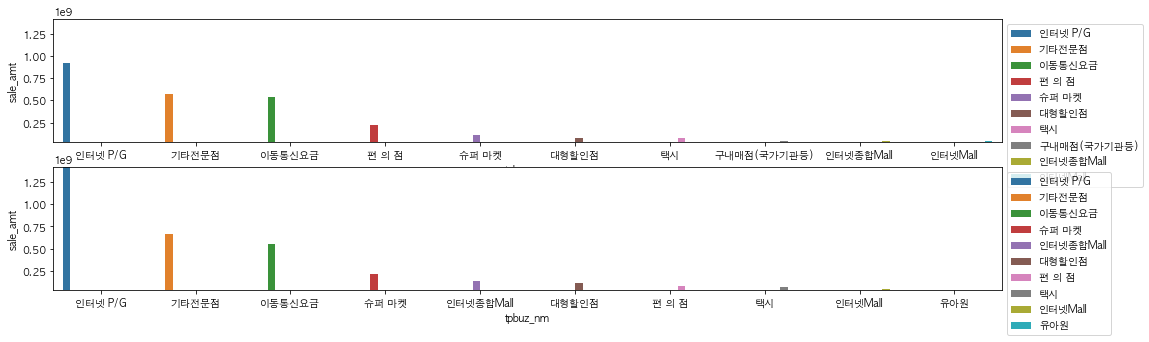

In [220]:
tmp0_0 = df1_0_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10)
tmp1_1 = df1_1_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10)


M = max(max(tmp0_0['sale_amt']), max(tmp1_1['sale_amt']))
m = min(min(tmp0_0['sale_amt']), min(tmp1_1['sale_amt']))
    
plt.figure(figsize=(17,5))
plt.subplot(211)
plot1 = sns.barplot(data= tmp0_0 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
plt.xticks(fontsize=10)
plot1.set_ylim(m,M)
plt.legend(bbox_to_anchor=(1, 1))
    
plt.subplot(212)
plot2 = sns.barplot(data= tmp1_1 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
plt.xticks(fontsize=10)
plot2.set_ylim(m,M)
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

10


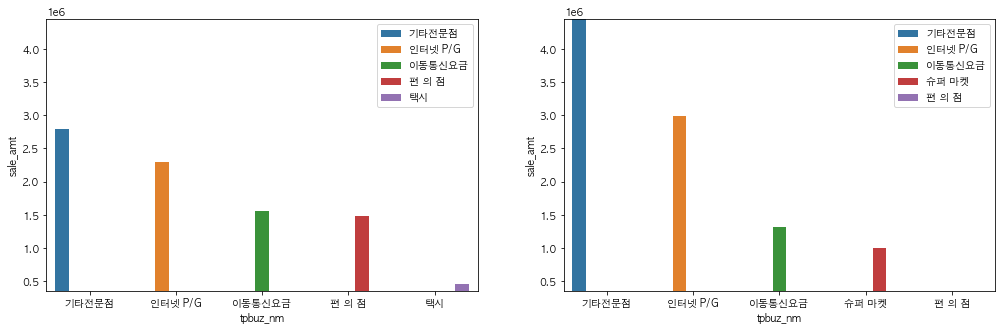

11


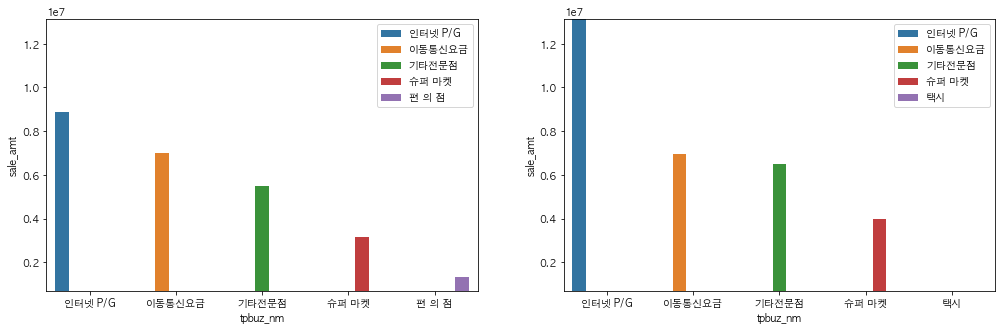

12


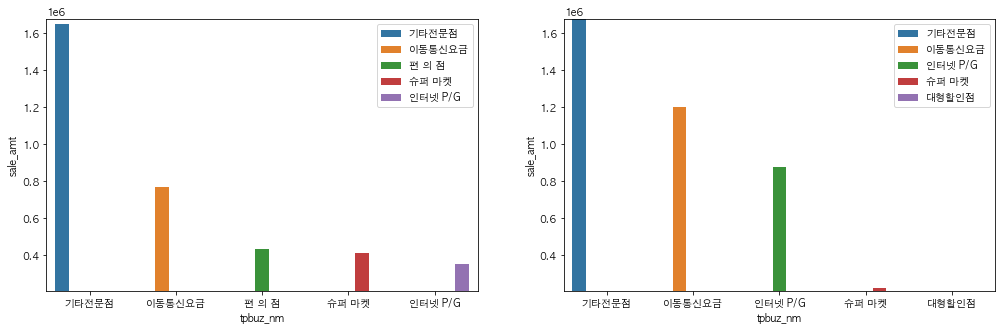

13


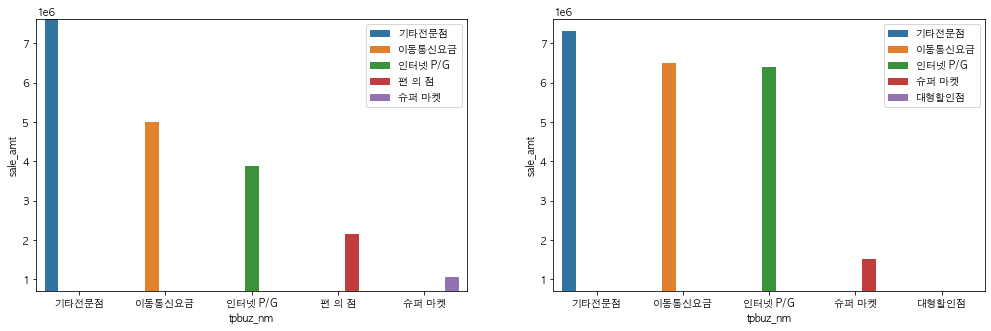

14


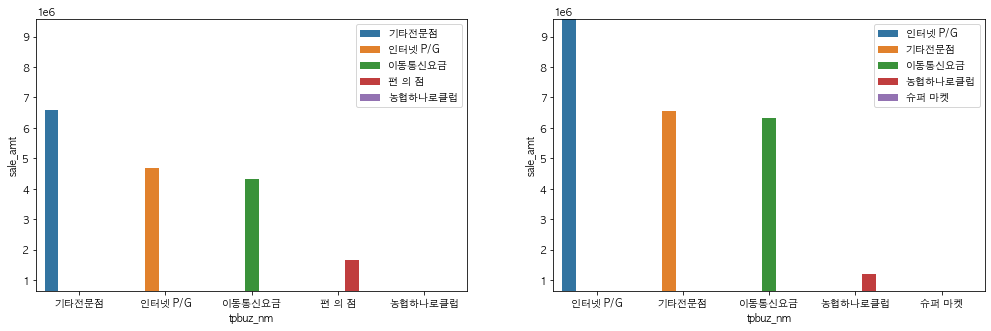

16


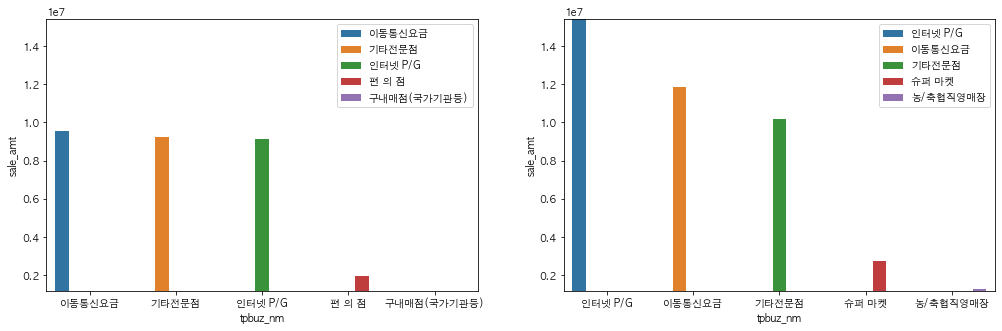

17


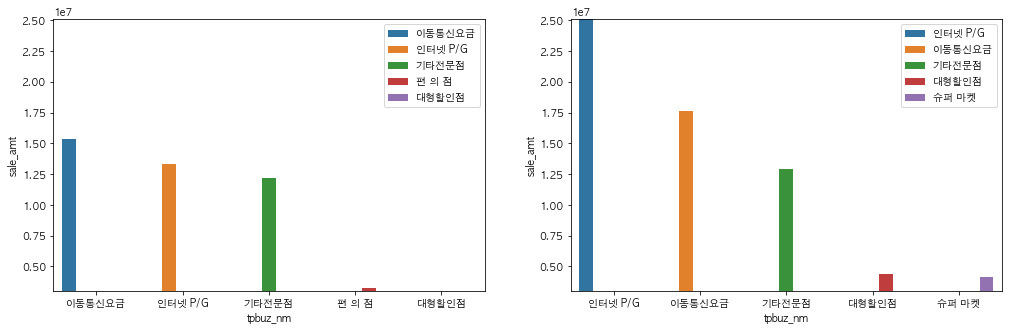

18


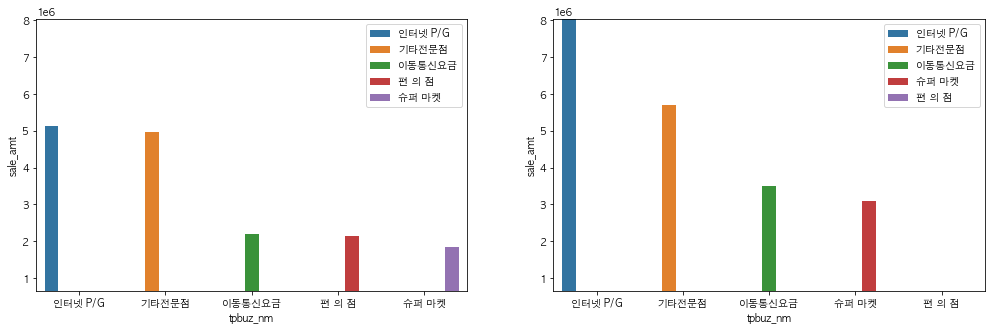

19


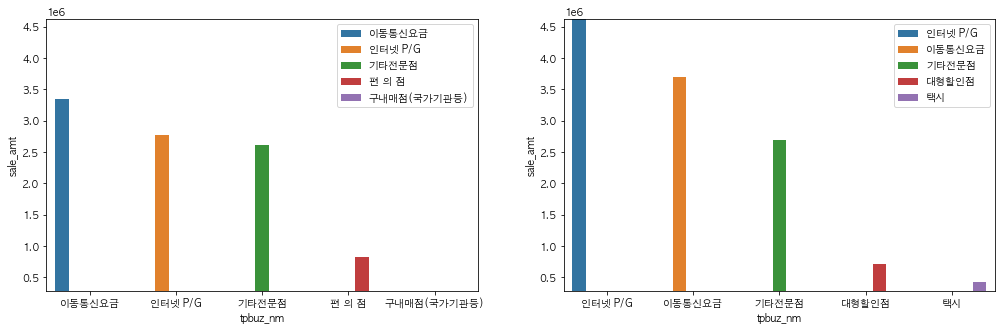

20


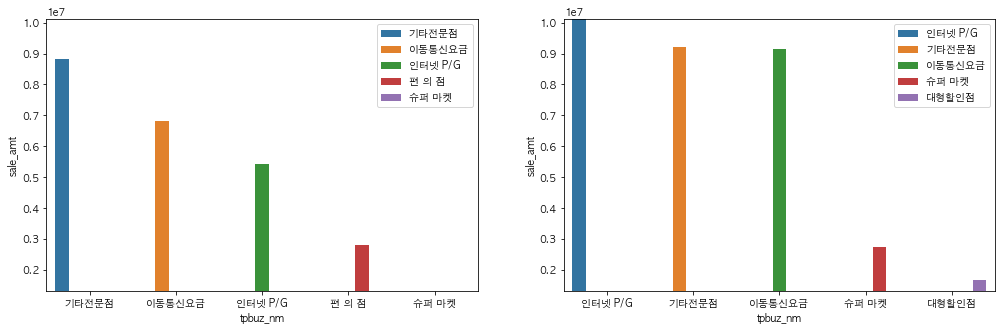

21


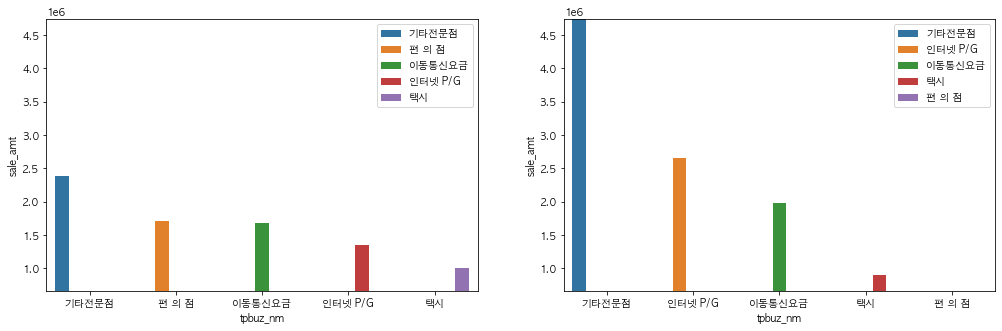

22


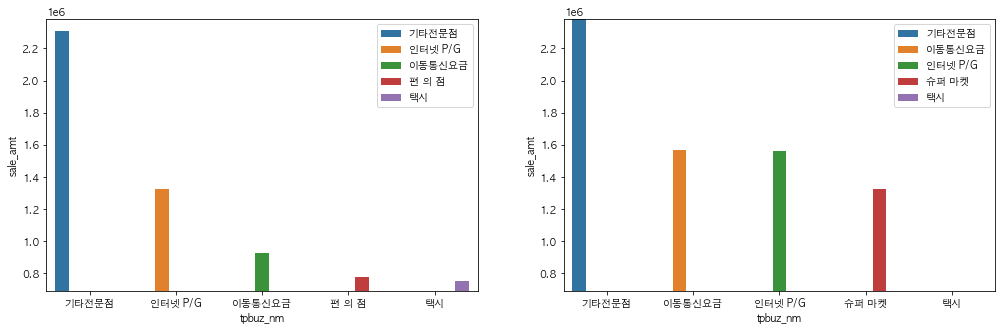

24


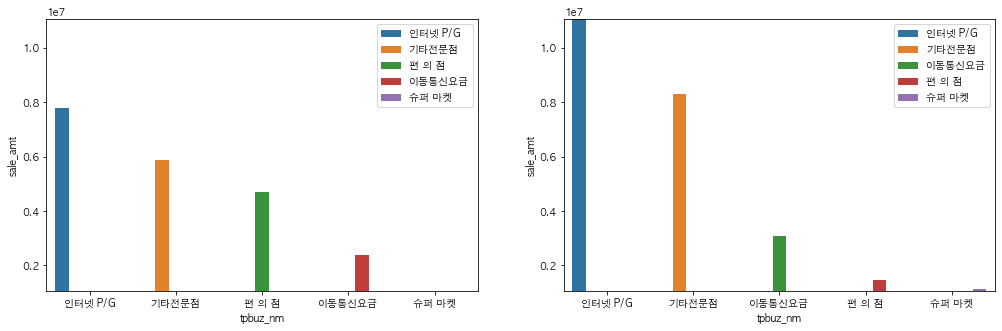

25


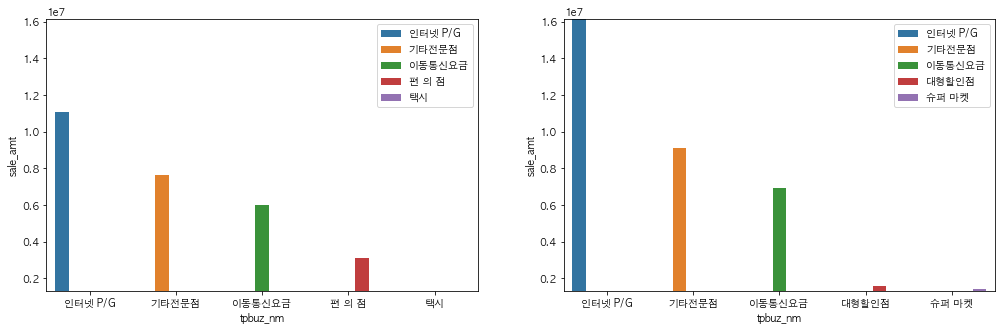

26


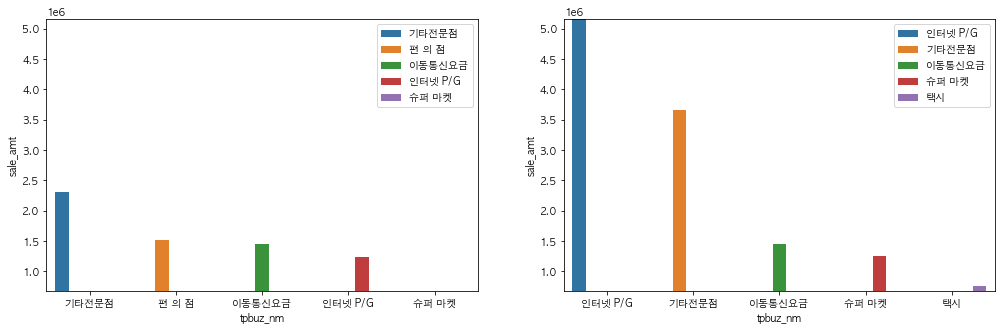

27


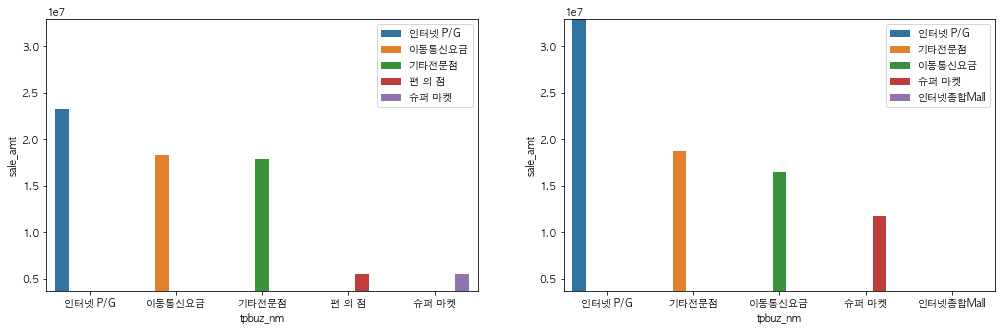

28


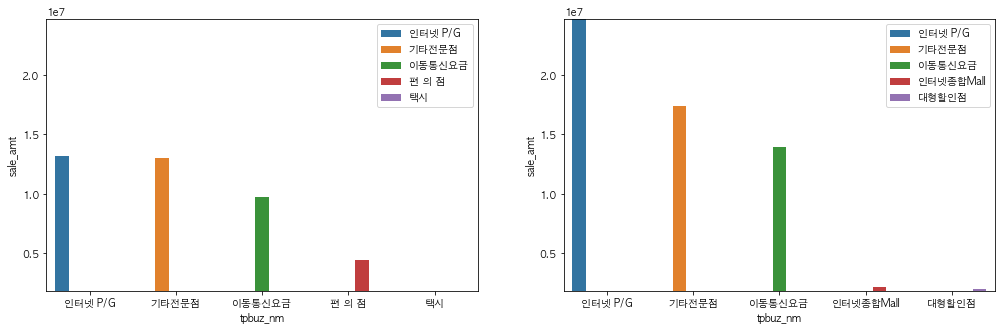

30


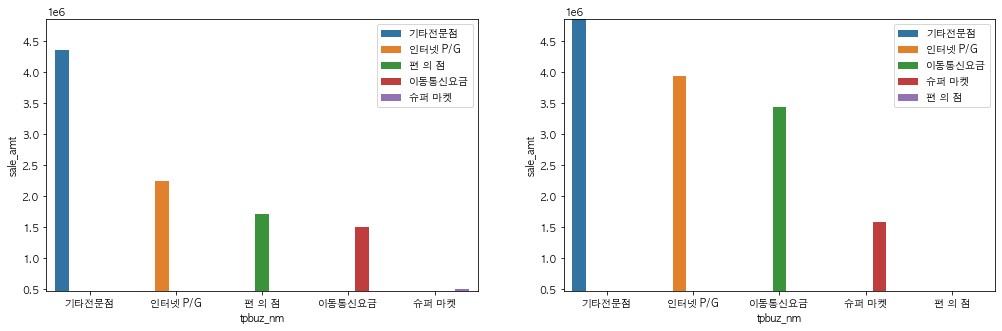

31


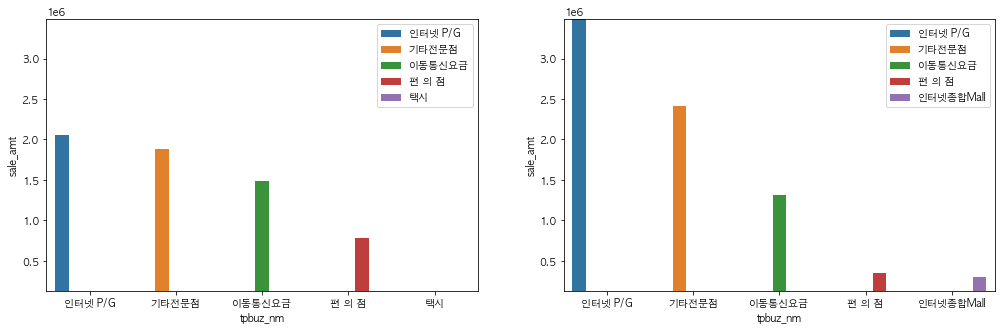

33


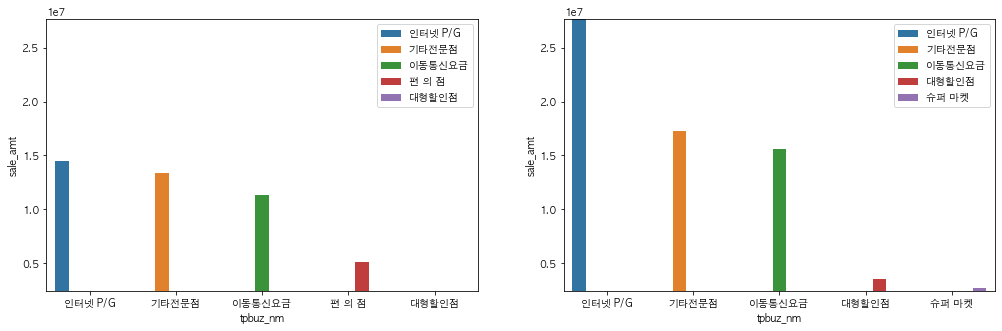

34


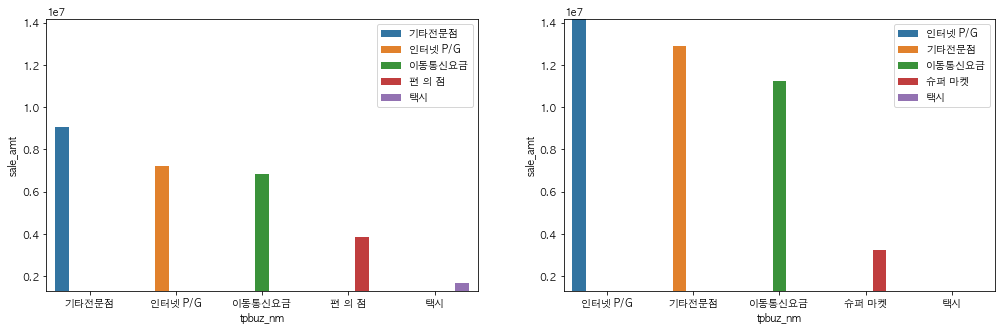

35


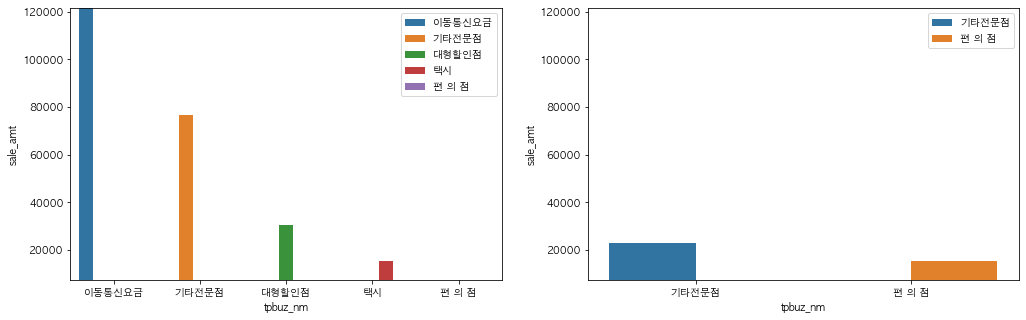

36


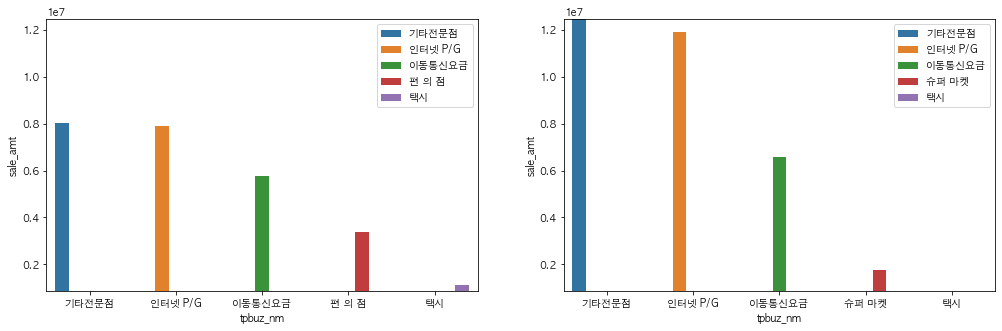

37


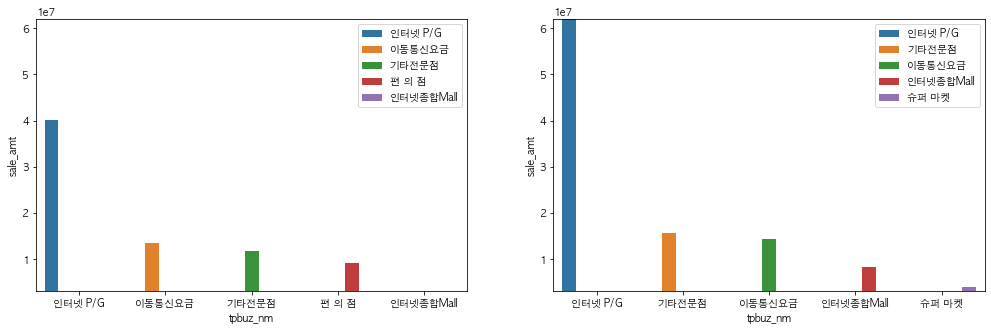

39


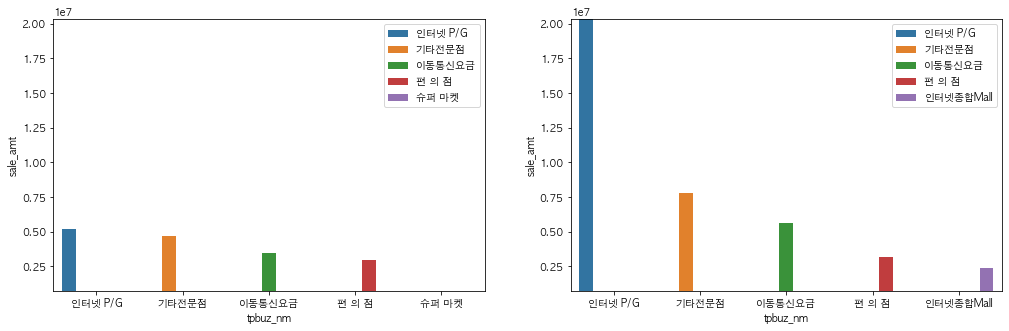

40


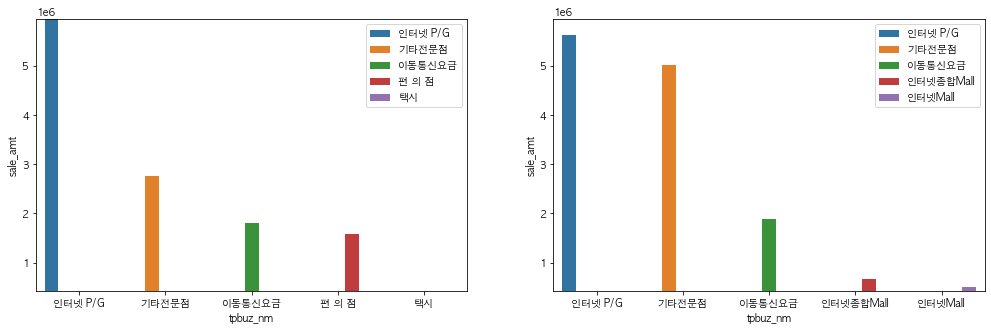

41


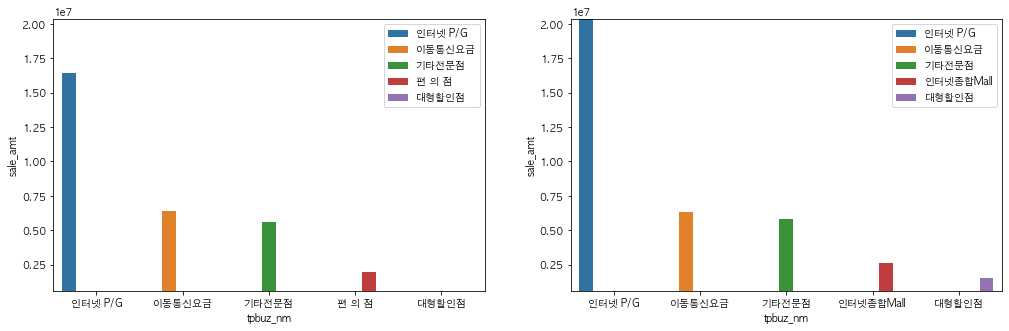

42


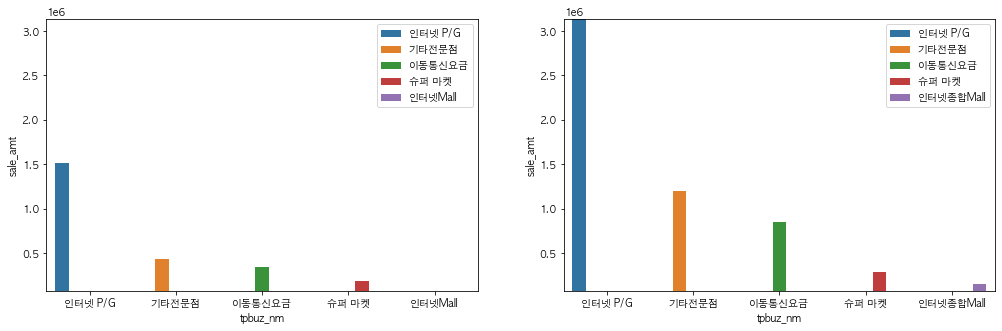

43


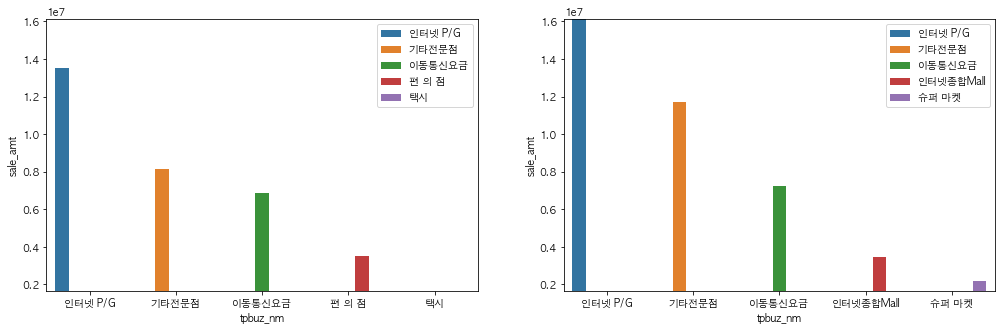

44


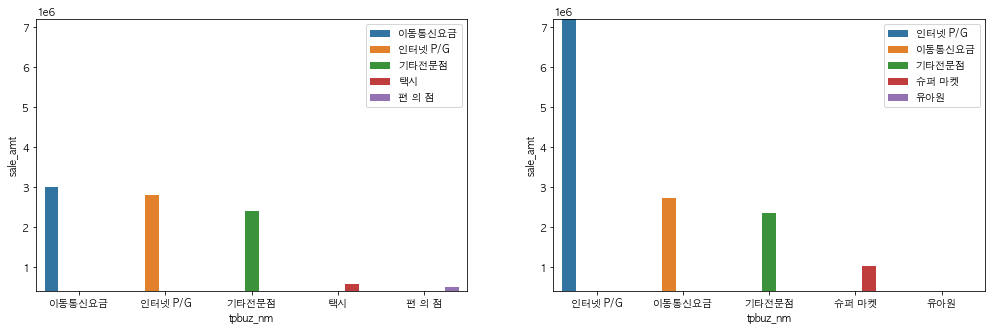

45


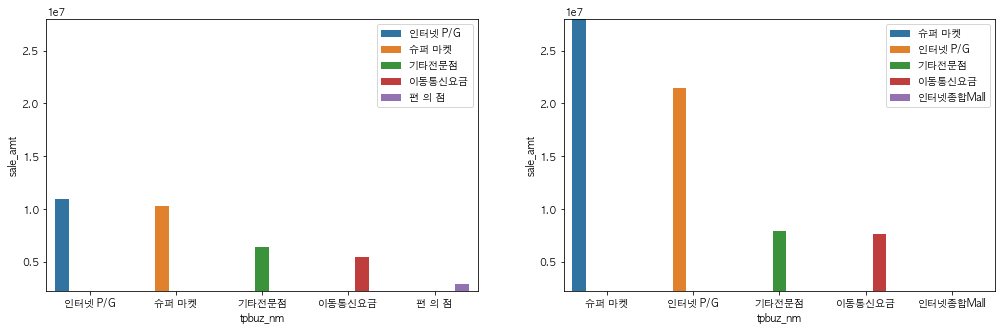

46


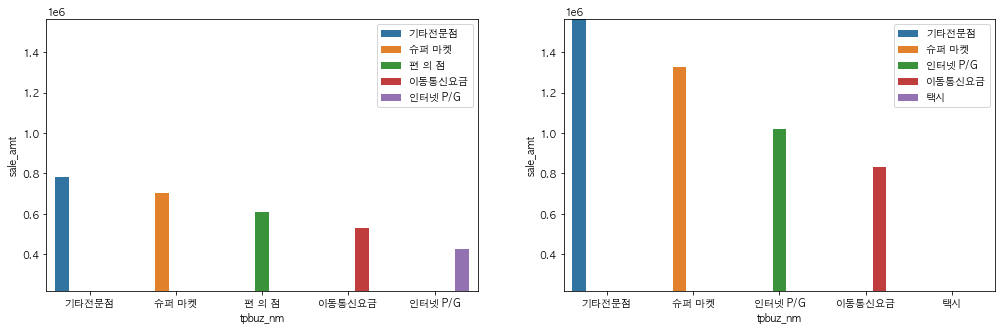

47


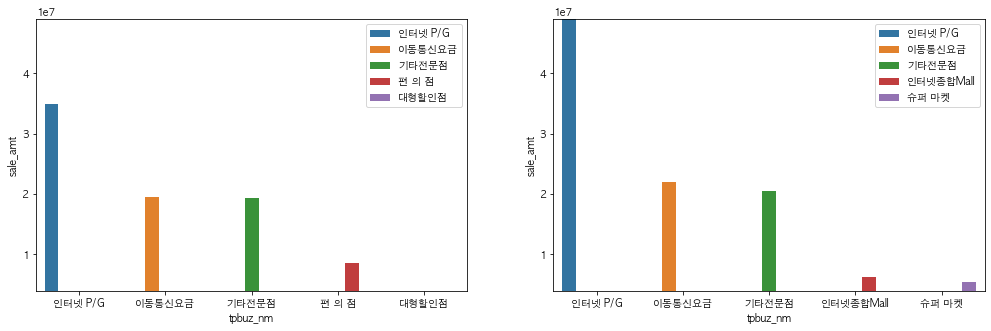

48


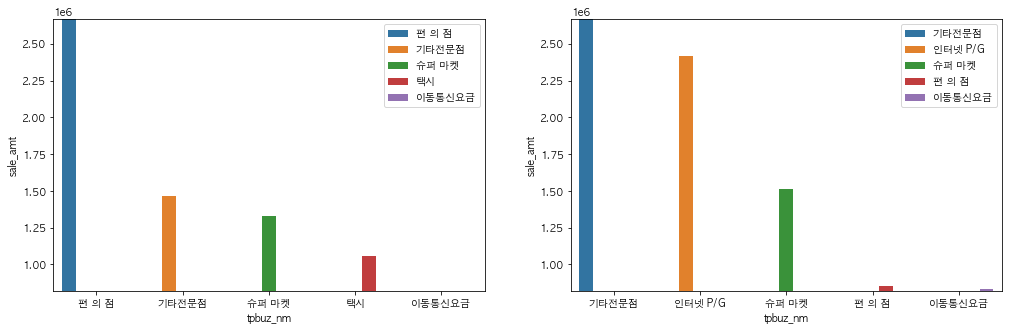

49


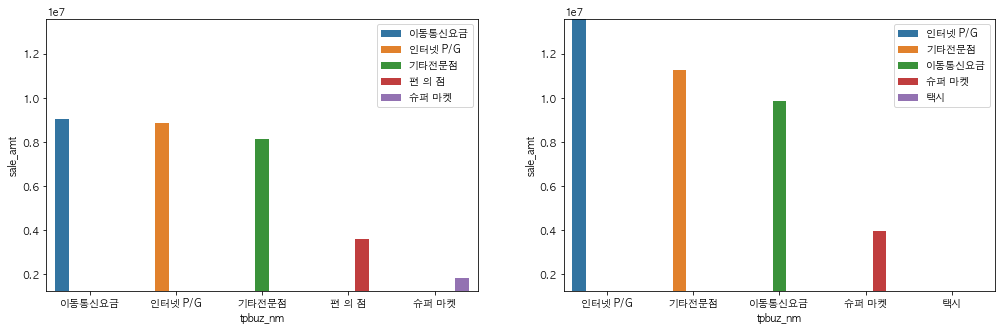

50


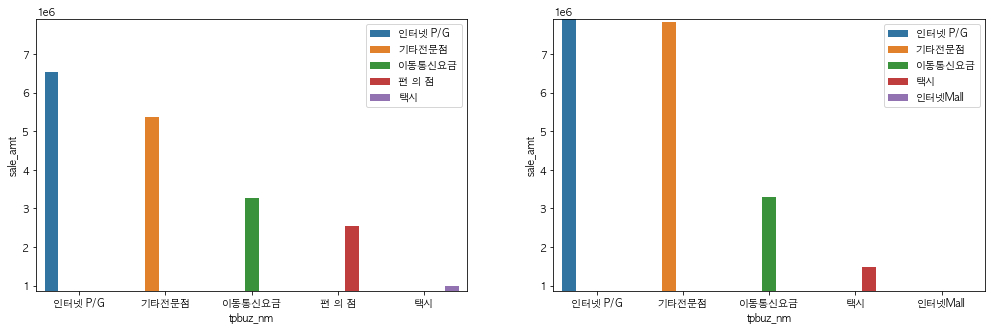

51


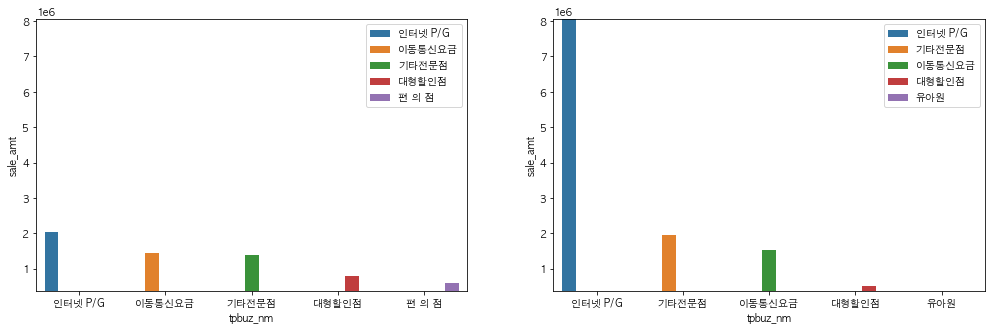

52


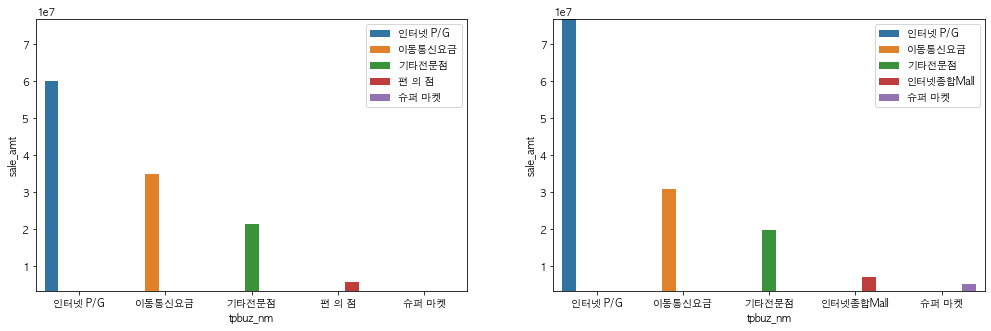

53


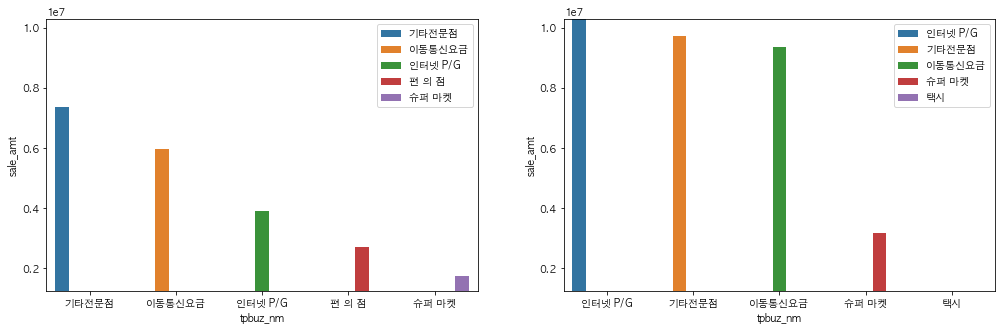

54


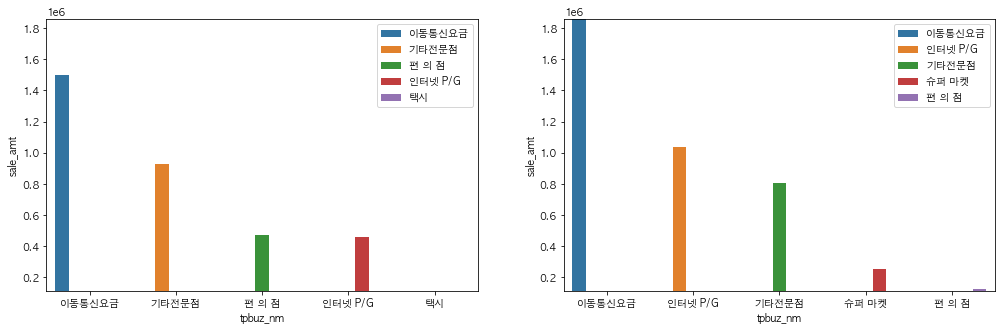

55


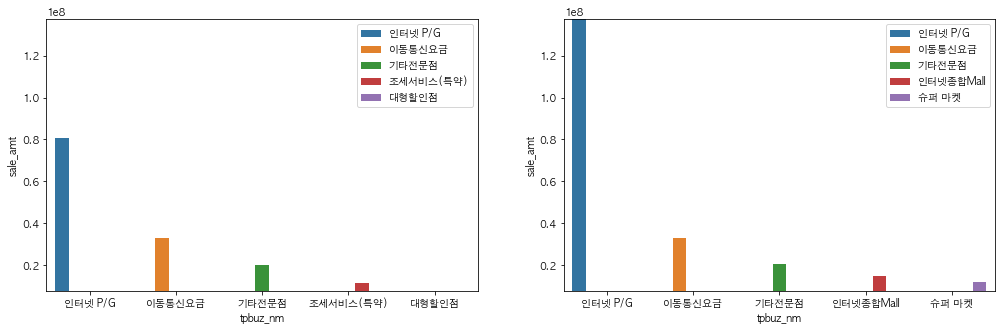

56


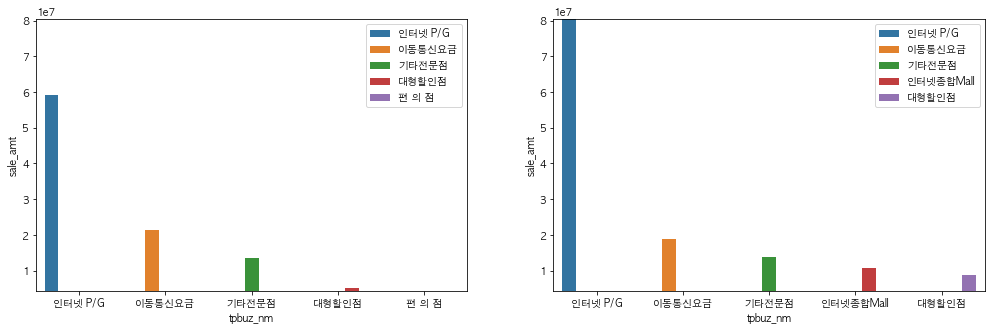

57


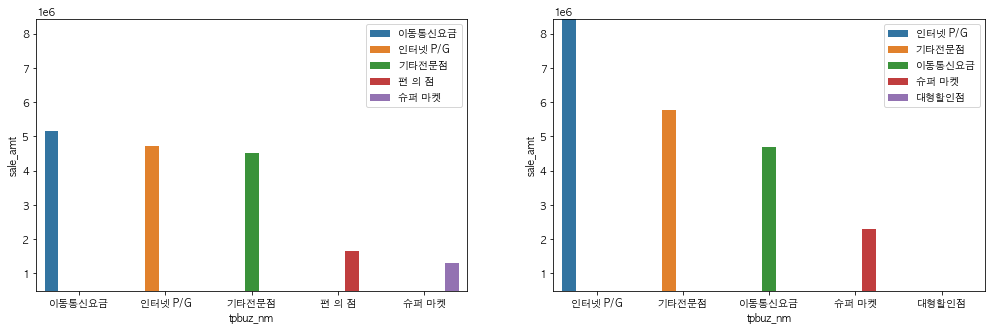

58


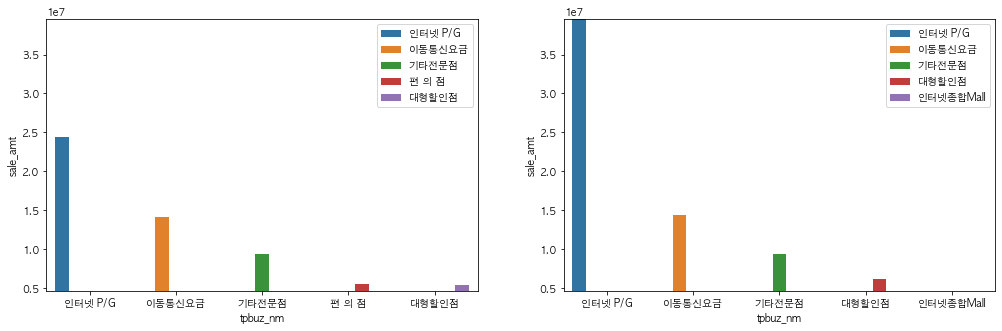

60


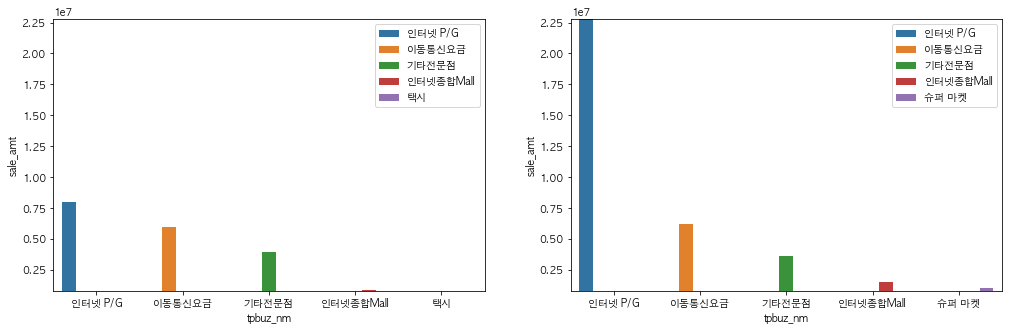

61


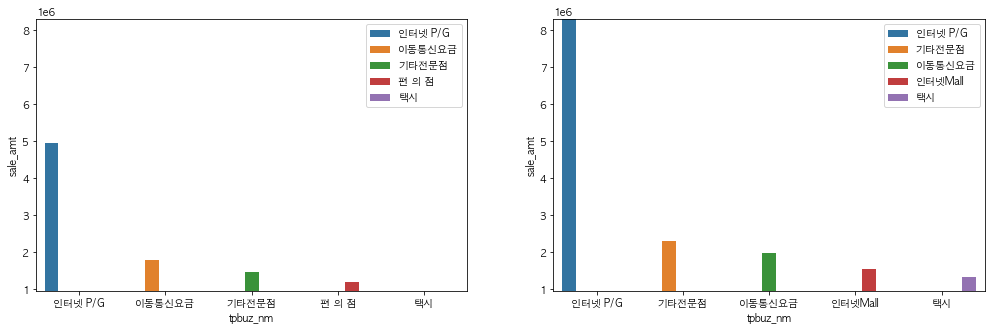

62


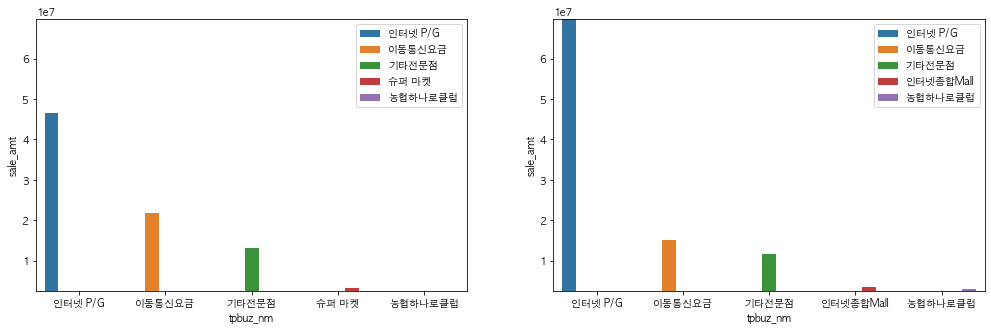

63


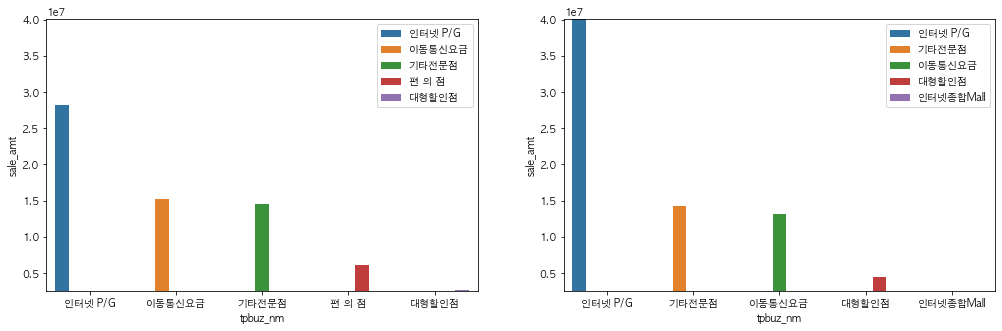

65


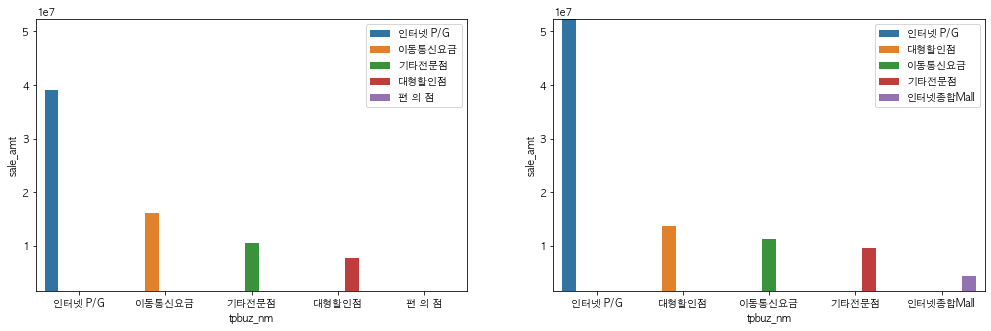

66


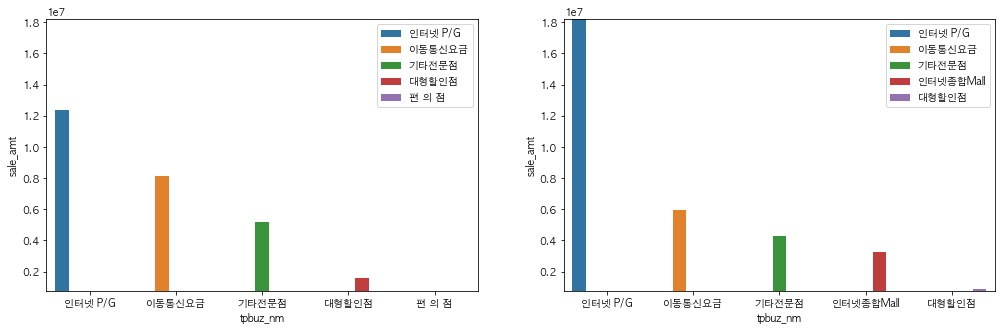

67


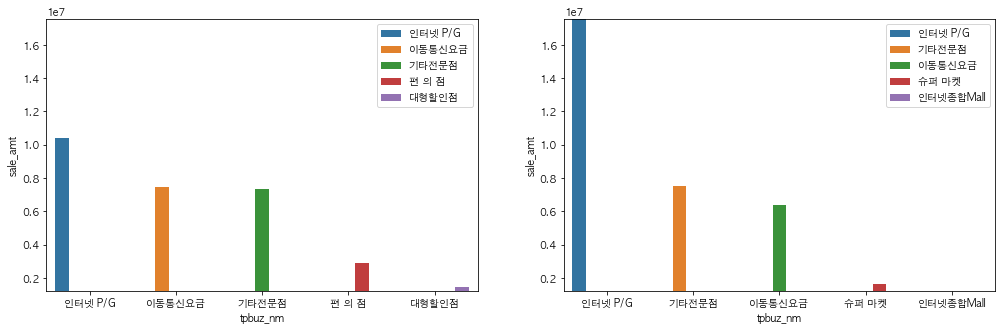

68


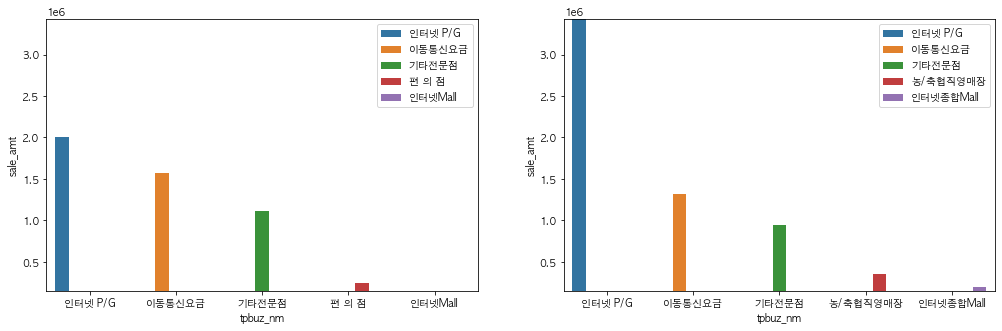

69


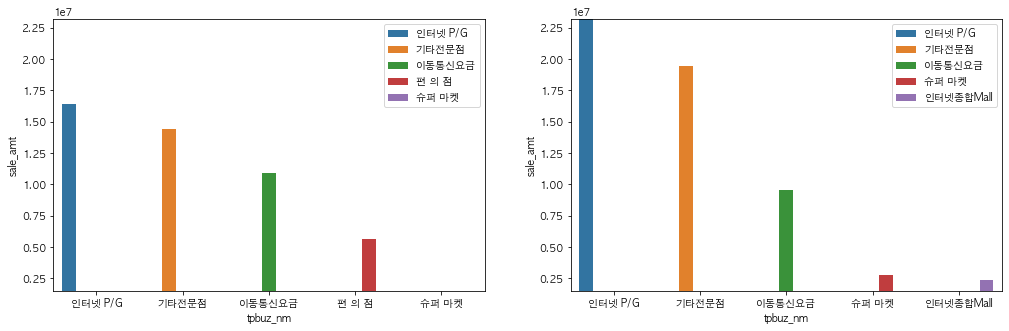

70


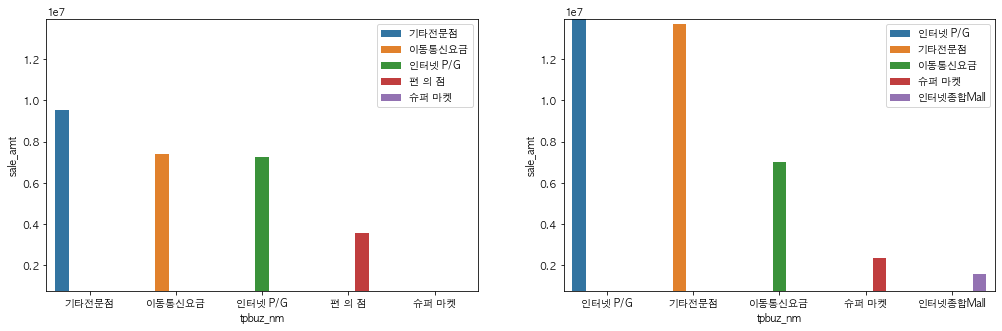

72


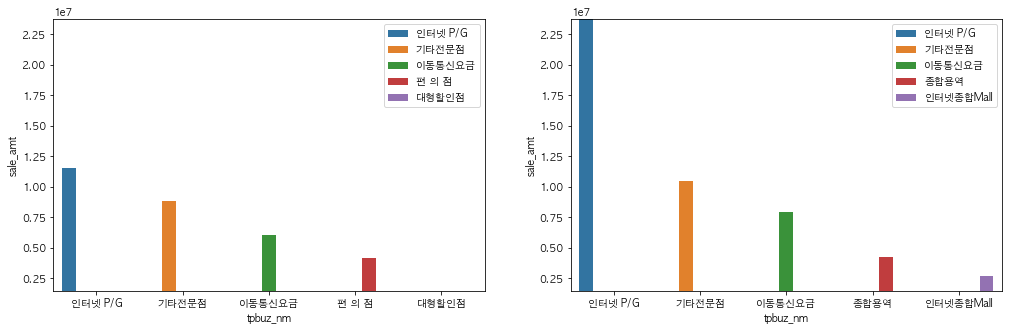

73


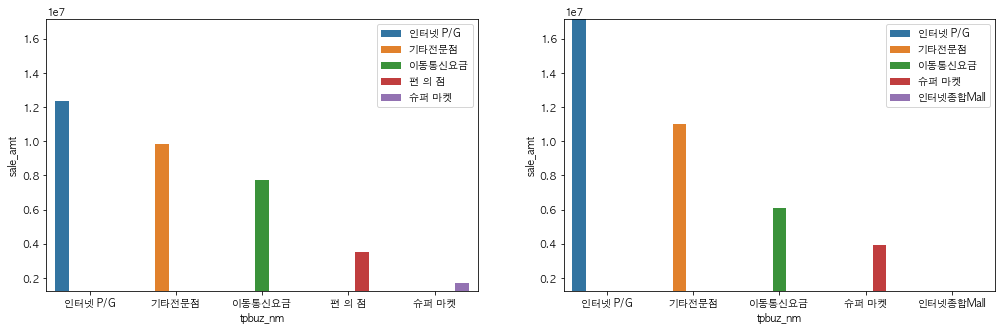

74


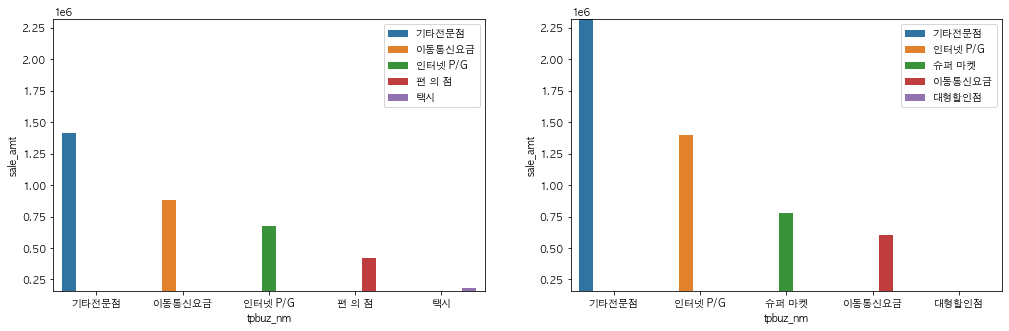

75


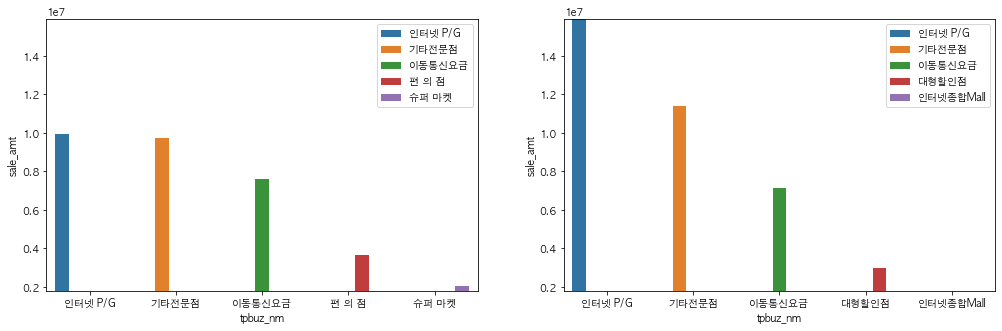

76


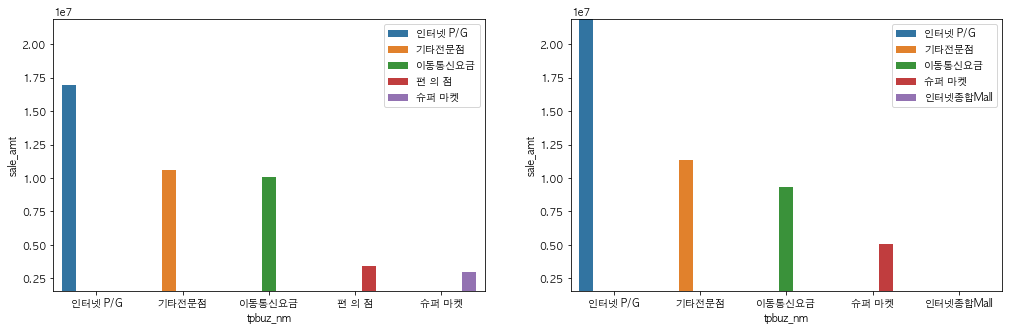

77


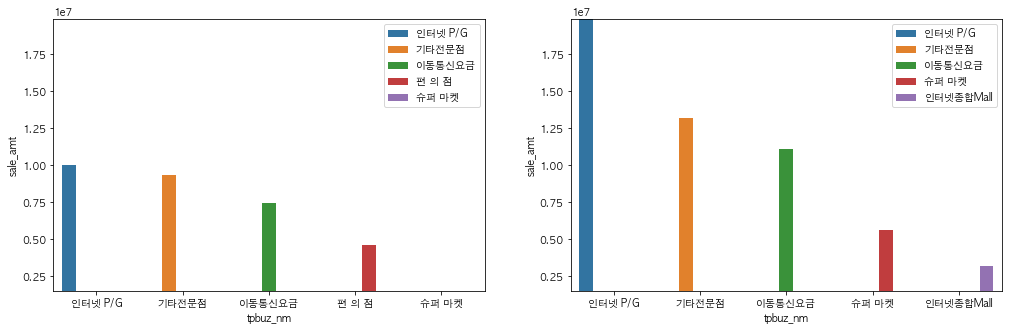

78


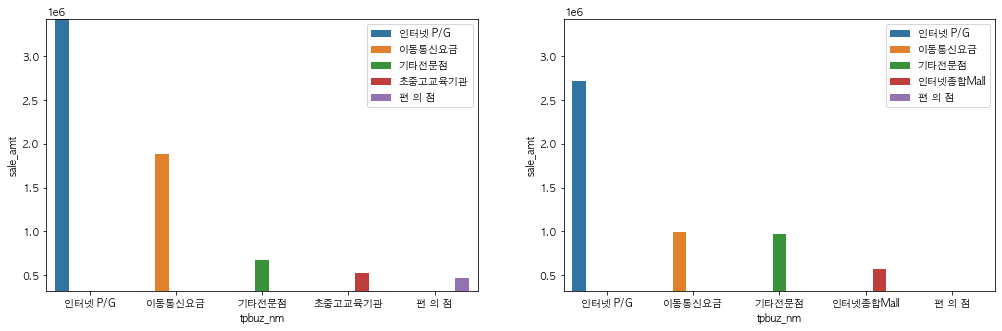

79


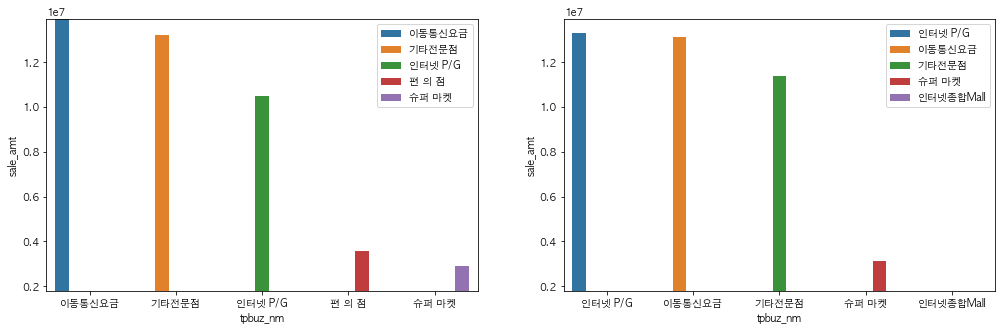

80


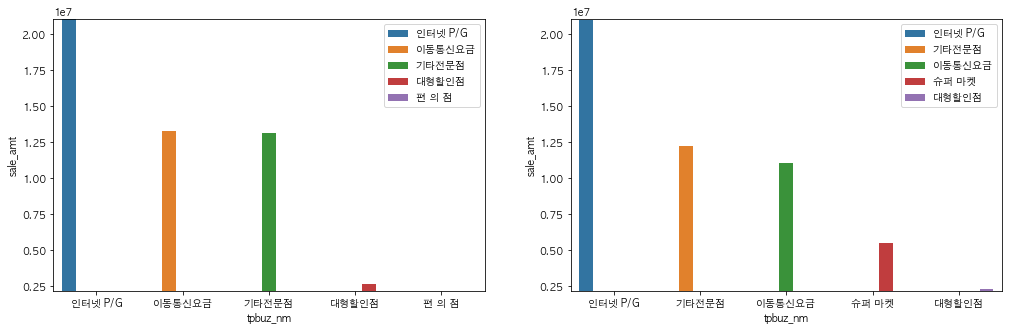

81


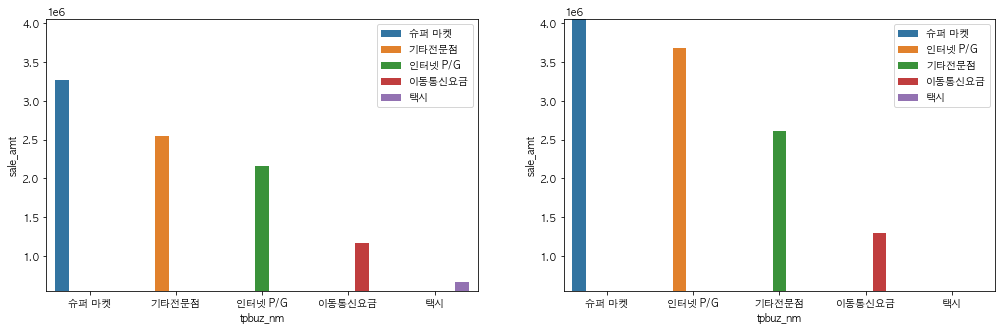

82


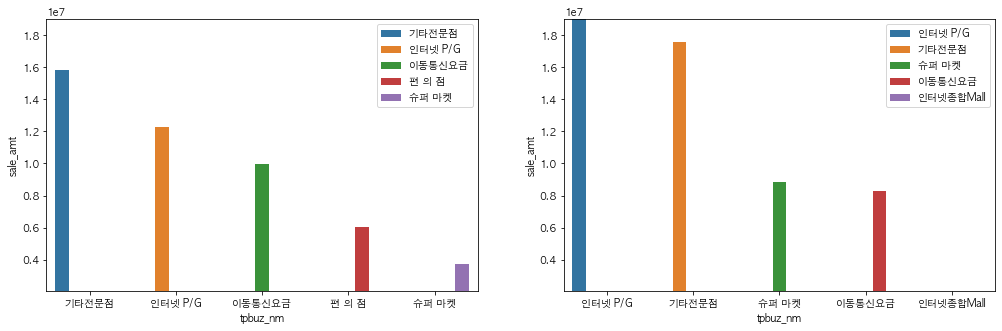

83


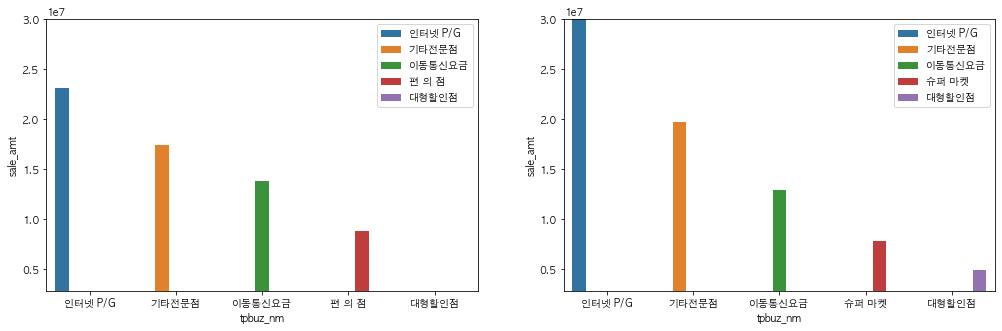

85


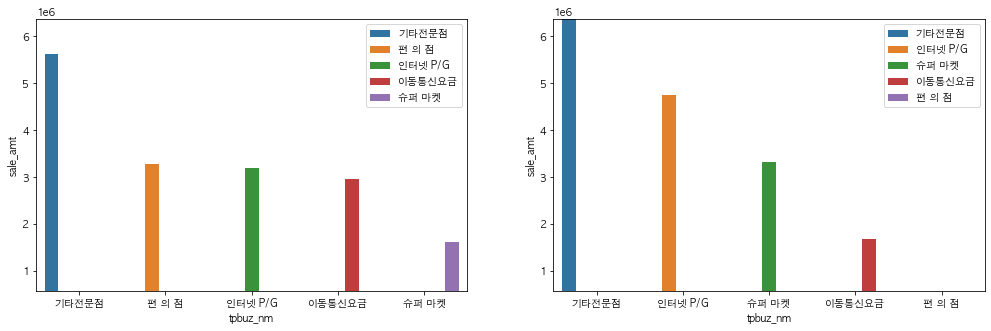

86


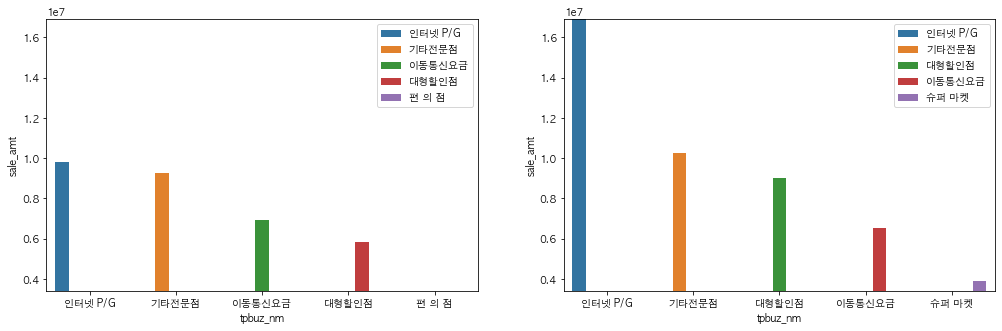

87


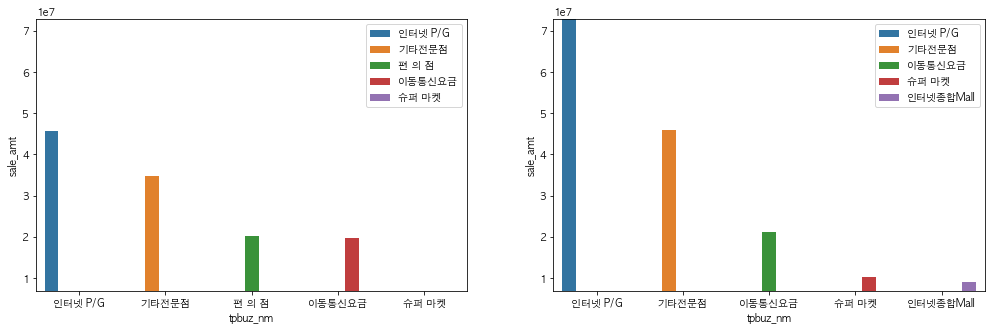

88


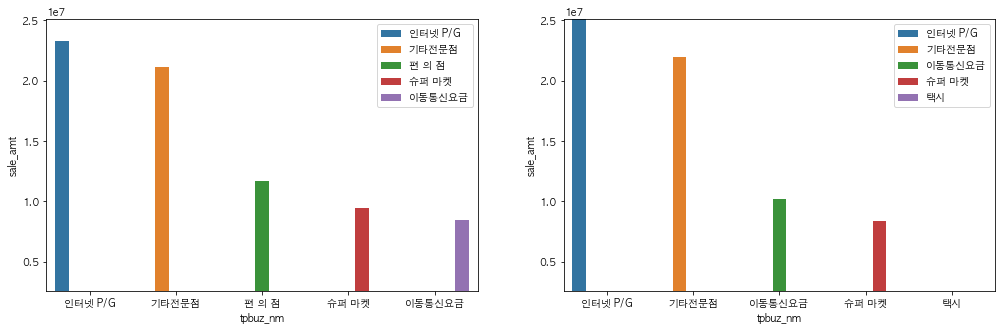

In [176]:
for i in sorted(set(df1['nw_zp'])):
    tmp0 = df1_0_SUM[df1_0_SUM['nw_zp']==i]
    tmp1 = df1_1_SUM[df1_1_SUM ['nw_zp']==i]
    tmp0_0 = tmp0.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
    tmp1_1 = tmp1.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
    M = max(max(tmp0_0['sale_amt']), max(tmp1_1['sale_amt']))
    m = min(min(tmp0_0['sale_amt']), min(tmp1_1['sale_amt']))
    print(i)
    plt.figure(figsize=(17,5))
    plt.subplot(121)
    plot1 = sns.barplot(data= tmp0_0 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
    plt.xticks(fontsize=10)
    plot1.set_ylim(m,M)
    plt.legend(loc='upper right')
    
    plt.subplot(122)
    plot2 = sns.barplot(data= tmp1_1 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
    plt.xticks(fontsize=10)
    plot2.set_ylim(m,M)
    plt.legend(loc='upper right')
    
    plt.show()

# 성별

In [116]:
age

,Unnamed: 0,cstmr_nw_zp,gn_cd,sale_dv_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt,counts
0,1,1002,20,5,9998,기타전문점,300,1
1,2,1002,20,9,4010,편 의 점,11140,1
2,3,1002,20,9,4121,구내매점(국가기관등),20423,1
3,4,1002,25,9,1123,택시,19400,1
4,5,1002,30,5,9998,기타전문점,600,4
...,...,...,...,...,...,...,...,...
75278,75279,8866,50,5,9998,기타전문점,7457,5
75279,75280,8866,50,9,4020,슈퍼 마켓,35913,1
75280,75281,8866,55,5,4020,슈퍼 마켓,95177,1
75281,75282,8866,60,5,9998,기타전문점,300,1


In [117]:
age['cstmr_nw_zp']= age['cstmr_nw_zp'].apply(lambda x: str(x))

In [118]:
age['nw_zp']= age['cstmr_nw_zp'].apply(lambda x : x[0:2])

In [119]:
age

,Unnamed: 0,cstmr_nw_zp,gn_cd,sale_dv_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt,counts,nw_zp
0,1,1002,20,5,9998,기타전문점,300,1,10
1,2,1002,20,9,4010,편 의 점,11140,1,10
2,3,1002,20,9,4121,구내매점(국가기관등),20423,1,10
3,4,1002,25,9,1123,택시,19400,1,10
4,5,1002,30,5,9998,기타전문점,600,4,10
...,...,...,...,...,...,...,...,...,...
75278,75279,8866,50,5,9998,기타전문점,7457,5,88
75279,75280,8866,50,9,4020,슈퍼 마켓,35913,1,88
75280,75281,8866,55,5,4020,슈퍼 마켓,95177,1,88
75281,75282,8866,60,5,9998,기타전문점,300,1,88


In [120]:
df2 = age[['nw_zp','gn_cd','mer_tpbuz_cd','tpbuz_nm','sale_amt']]

In [121]:
df2

,nw_zp,gn_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt
0,10,20,9998,기타전문점,300
1,10,20,4010,편 의 점,11140
2,10,20,4121,구내매점(국가기관등),20423
3,10,25,1123,택시,19400
4,10,30,9998,기타전문점,600
...,...,...,...,...,...
75278,88,50,9998,기타전문점,7457
75279,88,50,4020,슈퍼 마켓,35913
75280,88,55,4020,슈퍼 마켓,95177
75281,88,60,9998,기타전문점,300


In [122]:
df2['gn_cd'].unique()

array([20, 25, 30, 35, 45, 50, 55, 60, 65, 70, 40, 15, 10])

In [126]:
df2_1 = df2[(df2['gn_cd']==10) | (df2['gn_cd']==15)]
df2_2 = df2[(df2['gn_cd']==20) | (df2['gn_cd']==25)]
df2_3 = df2[(df2['gn_cd']==30) | (df2['gn_cd']==35)]
df2_4 = df2[(df2['gn_cd']==40) | (df2['gn_cd']==45)]
df2_5 = df2[(df2['gn_cd']==50) | (df2['gn_cd']==55)]
df2_6 = df2[(df2['gn_cd']==60) | (df2['gn_cd']==65) | (df2['gn_cd']==70)]

In [128]:
df2_1_sum = df2_1.groupby(['mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_1_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10) # 10,15 지역구분 없이 매출 상위 10위 업종

,mer_tpbuz_cd,tpbuz_nm,gn_cd,sale_amt
10,4076,인터넷 P/G,1665,5344963
7,4010,편 의 점,3475,3085416
26,9998,기타전문점,3555,3048717
22,8399,기타음료식품,855,785319
20,8006,서양음식,730,581652
11,4077,인터넷종합Mall,330,504454
0,1123,택시,375,484686
2,2199,기타레져업,375,315441
8,4020,슈퍼 마켓,305,302981
17,8001,일반한식,160,216149


In [130]:
df2_2_sum = df2_2.groupby(['mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_2_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10) # 20,25 지역구분 없이 매출 상위 10위 업종

,mer_tpbuz_cd,tpbuz_nm,gn_cd,sale_amt
12,4076,인터넷 P/G,62525,338940143
51,9998,기타전문점,101230,327645401
9,4010,편 의 점,59445,104483024
1,1123,택시,50105,63325639
18,4121,구내매점(국가기관등),11990,41497290
14,4078,인터넷Mall,26635,33547834
13,4077,인터넷종합Mall,11850,27163503
46,9153,이동통신요금,5920,26037080
10,4020,슈퍼 마켓,8200,7428068
31,8006,서양음식,9735,6865220


In [131]:
df2_3_sum = df2_3.groupby(['mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_3_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10) # 30,35 지역구분 없이 매출 상위 10위 업종

,mer_tpbuz_cd,tpbuz_nm,gn_cd,sale_amt
13,4076,인터넷 P/G,95240,521708753
51,9998,기타전문점,163035,227021848
45,9153,이동통신요금,39295,169580739
10,4010,편 의 점,76940,84063598
14,4077,인터넷종합Mall,24175,74553194
15,4078,인터넷Mall,32785,29247180
1,1123,택시,37965,26985604
23,5123,유아원,1475,22658119
9,4004,대형할인점,10025,14532595
11,4020,슈퍼 마켓,16435,14008055


In [132]:
df2_4_sum = df2_4.groupby(['mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_4_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10) # 40,45 지역구분 없이 매출 상위 10위 업종

,mer_tpbuz_cd,tpbuz_nm,gn_cd,sale_amt
12,4076,인터넷 P/G,86890,855060861
50,9153,이동통신요금,87465,425619612
58,9998,기타전문점,216140,214365138
9,4010,편 의 점,88600,63734621
13,4077,인터넷종합Mall,17900,62218785
8,4004,대형할인점,26835,61572009
10,4020,슈퍼 마켓,47170,47920076
51,9161,조세서비스(특약),515,15765931
1,1123,택시,30355,14283889
14,4078,인터넷Mall,15805,12187937


In [133]:
df2_5_sum = df2_5.groupby(['mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_5_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10) # 50,55 지역구분 없이 매출 상위 10위 업종

,mer_tpbuz_cd,tpbuz_nm,gn_cd,sale_amt
11,4076,인터넷 P/G,56335,440591200
37,9153,이동통신요금,100015,381342947
42,9998,기타전문점,284330,253589671
9,4020,슈퍼 마켓,91645,98522976
7,4004,대형할인점,35630,56986838
8,4010,편 의 점,79290,37470083
1,1123,택시,55515,23751136
12,4077,인터넷종합Mall,3930,9399547
14,4110,농/축협직영매장,3470,6045841
38,9161,조세서비스(특약),200,5672809


In [134]:
df2_6_sum = df2_6.groupby(['mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_6_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(10) # 60,65,70 지역구분 없이 매출 상위 10위 업종

,mer_tpbuz_cd,tpbuz_nm,gn_cd,sale_amt
41,9998,기타전문점,382060,204349434
12,4076,인터넷 P/G,35715,184492994
9,4020,슈퍼 마켓,128685,159536977
36,9153,이동통신요금,55750,97070286
7,4004,대형할인점,36980,55194408
1,1123,택시,31325,10135423
8,4010,편 의 점,25690,8222734
15,4110,농/축협직영매장,4600,6500130
16,4111,농협하나로클럽,2125,6107536
30,8310,농축수산품,9500,6059104


In [129]:
df2

,nw_zp,gn_cd,mer_tpbuz_cd,tpbuz_nm,sale_amt
0,10,20,9998,기타전문점,300
1,10,20,4010,편 의 점,11140
2,10,20,4121,구내매점(국가기관등),20423
3,10,25,1123,택시,19400
4,10,30,9998,기타전문점,600
...,...,...,...,...,...
75278,88,50,9998,기타전문점,7457
75279,88,50,4020,슈퍼 마켓,35913
75280,88,55,4020,슈퍼 마켓,95177
75281,88,60,9998,기타전문점,300


In [141]:
df2_1_SUM = df2_1.groupby(['nw_zp','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_2_SUM = df2_2.groupby(['nw_zp','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_3_SUM = df2_3.groupby(['nw_zp','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_4_SUM = df2_4.groupby(['nw_zp','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_5_SUM = df2_5.groupby(['nw_zp','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()
df2_6_SUM = df2_6.groupby(['nw_zp','mer_tpbuz_cd','tpbuz_nm']).sum().reset_index()

In [142]:
df2_1_SUM['gn_cd_cl']= 10
df2_2_SUM['gn_cd_cl']= 20
df2_3_SUM['gn_cd_cl']= 30
df2_4_SUM['gn_cd_cl']= 40
df2_5_SUM['gn_cd_cl']= 50
df2_6_SUM['gn_cd_cl']= 60

In [143]:
df2_1_SUM.drop(['gn_cd'], axis=1, inplace=True)
df2_2_SUM.drop(['gn_cd'], axis=1, inplace=True)
df2_3_SUM.drop(['gn_cd'], axis=1, inplace=True)
df2_4_SUM.drop(['gn_cd'], axis=1, inplace=True)
df2_5_SUM.drop(['gn_cd'], axis=1, inplace=True)
df2_6_SUM.drop(['gn_cd'], axis=1, inplace=True)

In [156]:
for j in set(range(1,7)):
    exec("temp_"+str(j)+ "= pd.DataFrame(index=range(0,len(set(df2['nw_zp']))),columns = ['nw_zp','" + str(j)+ "0대'])" )
    n=0
    for i in sorted(set(df2['nw_zp'])):
        temp_list = [np.nan]
        exec("tmp0 = df2_"+ str(j) + "_SUM[df2_"+ str(j)+ "_SUM['nw_zp']==i]")
        tmp0_0 = tmp0.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
        temp_list.append(list(tmp0_0['tpbuz_nm']))
        exec("temp_"+ str(j) + ".iloc[n,:] = temp_list")
        n += 1
        exec("temp_"+ str(j)+ "['nw_zp']= sorted(set(df2['nw_zp']))")

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [157]:
temp_1

,nw_zp,10대
0,10,[편 의 점]
1,11,"[인터넷 P/G, 택시, 기타전문점, 서양음식, 편 의 점]"
2,12,[]
3,13,"[서양음식, 기타전문점]"
4,14,"[기타전문점, 인터넷 P/G, 편 의 점, 슈퍼 마켓, 서양음식]"
...,...,...
65,83,"[편 의 점, 서양음식, 인터넷 P/G, 기타레져업, 기타음료식품]"
66,85,"[기타전문점, 인터넷 P/G]"
67,86,"[기타전문점, 편 의 점, 인터넷 P/G, 사무서비스, 대형할인점]"
68,87,"[기타전문점, 편 의 점, 인터넷 P/G, 인터넷종합Mall, 서양음식]"


In [159]:
temp_2

,nw_zp,20대
0,10,"[기타전문점, 인터넷 P/G, 편 의 점, 택시, 이동통신요금]"
1,11,"[기타전문점, 인터넷 P/G, 구내매점(국가기관등), 택시, 편 의 점]"
2,12,"[기타전문점, 구내매점(국가기관등), 편 의 점, 택시, 인터넷 P/G]"
3,13,"[기타전문점, 인터넷 P/G, 편 의 점, 택시, 구내매점(국가기관등)]"
4,14,"[기타전문점, 인터넷 P/G, 편 의 점, 택시, 구내매점(국가기관등)]"
...,...,...
65,83,"[기타전문점, 인터넷 P/G, 편 의 점, 택시, 구내매점(국가기관등)]"
66,85,"[기타전문점, 인터넷 P/G, 편 의 점, 택시, 이동통신요금]"
67,86,"[기타전문점, 인터넷 P/G, 편 의 점, 택시, 구내매점(국가기관등)]"
68,87,"[인터넷 P/G, 기타전문점, 편 의 점, 인터넷Mall, 택시]"


In [160]:
temp_3

,nw_zp,30대
0,10,"[기타전문점, 인터넷 P/G, 편 의 점, 택시, 이동통신요금]"
1,11,"[인터넷 P/G, 이동통신요금, 기타전문점, 편 의 점, 인터넷종합Mall]"
2,12,"[기타전문점, 편 의 점, 생명 보험, 인터넷 P/G, 이동통신요금]"
3,13,"[이동통신요금, 기타전문점, 인터넷 P/G, 편 의 점, 택시]"
4,14,"[기타전문점, 인터넷 P/G, 이동통신요금, 편 의 점, 택시]"
...,...,...
65,83,"[인터넷 P/G, 기타전문점, 이동통신요금, 편 의 점, 유아원]"
66,85,"[인터넷 P/G, 기타전문점, 편 의 점, 이동통신요금, 유아원]"
67,86,"[인터넷 P/G, 기타전문점, 대형할인점, 이동통신요금, 편 의 점]"
68,87,"[인터넷 P/G, 기타전문점, 이동통신요금, 편 의 점, 인터넷종합Mall]"


In [161]:
temp_4

,nw_zp,40대
0,10,"[인터넷 P/G, 이동통신요금, 기타전문점, 편 의 점, 슈퍼 마켓]"
1,11,"[인터넷 P/G, 이동통신요금, 기타전문점, 슈퍼 마켓, 편 의 점]"
2,12,"[이동통신요금, 기타전문점, 인터넷 P/G, 편 의 점, 택시]"
3,13,"[인터넷 P/G, 이동통신요금, 기타전문점, 편 의 점, 슈퍼 마켓]"
4,14,"[이동통신요금, 인터넷 P/G, 기타전문점, 편 의 점, 대형할인점]"
...,...,...
65,83,"[인터넷 P/G, 이동통신요금, 기타전문점, 대형할인점, 편 의 점]"
66,85,"[이동통신요금, 기타전문점, 인터넷 P/G, 슈퍼 마켓, 편 의 점]"
67,86,"[인터넷 P/G, 이동통신요금, 대형할인점, 기타전문점, 유아원]"
68,87,"[인터넷 P/G, 이동통신요금, 기타전문점, 슈퍼 마켓, 편 의 점]"


In [162]:
temp_5

,nw_zp,50대
0,10,"[기타전문점, 이동통신요금, 인터넷 P/G, 슈퍼 마켓, 편 의 점]"
1,11,"[인터넷 P/G, 이동통신요금, 슈퍼 마켓, 기타전문점, 택시]"
2,12,"[인터넷 P/G, 기타전문점, 이동통신요금, 슈퍼 마켓, 택시]"
3,13,"[이동통신요금, 기타전문점, 인터넷 P/G, 슈퍼 마켓, 편 의 점]"
4,14,"[인터넷 P/G, 이동통신요금, 기타전문점, 농협하나로클럽, 슈퍼 마켓]"
...,...,...
65,83,"[인터넷 P/G, 기타전문점, 이동통신요금, 슈퍼 마켓, 대형할인점]"
66,85,"[슈퍼 마켓, 기타전문점, 인터넷 P/G, 이동통신요금, 편 의 점]"
67,86,"[인터넷 P/G, 기타전문점, 이동통신요금, 대형할인점, 슈퍼 마켓]"
68,87,"[이동통신요금, 기타전문점, 인터넷 P/G, 슈퍼 마켓, 편 의 점]"


In [158]:
temp_6

,nw_zp,60대
0,10,"[기타전문점, 인터넷 P/G, 이동통신요금, 슈퍼 마켓, 편 의 점]"
1,11,"[슈퍼 마켓, 기타전문점, 인터넷 P/G, 이동통신요금, 택시]"
2,12,"[기타전문점, 슈퍼 마켓, 이동통신요금, 대형할인점, 택시]"
3,13,"[기타전문점, 인터넷 P/G, 이동통신요금, 슈퍼 마켓, 대형할인점]"
4,14,"[기타전문점, 인터넷 P/G, 이동통신요금, 농협하나로클럽, 슈퍼 마켓]"
...,...,...
65,83,"[기타전문점, 슈퍼 마켓, 인터넷 P/G, 이동통신요금, 대형할인점]"
66,85,"[기타전문점, 슈퍼 마켓, 인터넷 P/G, 대형할인점, 택시]"
67,86,"[기타전문점, 대형할인점, 슈퍼 마켓, 인터넷 P/G, 이동통신요금]"
68,87,"[기타전문점, 슈퍼 마켓, 인터넷 P/G, 이동통신요금, 농/축협직영매장]"


In [165]:
from functools import reduce
temps = [temp_1, temp_2, temp_3, temp_4, temp_5, temp_6]
temp2 = reduce(lambda left, right: pd.merge(left, right, on='nw_zp'), temps)
temp2

,nw_zp,10대,20대,30대,40대,50대,60대
0,10,[편 의 점],"[기타전문점, 인터넷 P/G, 편 의 점, 택시, 이동통신요금]","[기타전문점, 인터넷 P/G, 편 의 점, 택시, 이동통신요금]","[인터넷 P/G, 이동통신요금, 기타전문점, 편 의 점, 슈퍼 마켓]","[기타전문점, 이동통신요금, 인터넷 P/G, 슈퍼 마켓, 편 의 점]","[기타전문점, 인터넷 P/G, 이동통신요금, 슈퍼 마켓, 편 의 점]"
1,11,"[인터넷 P/G, 택시, 기타전문점, 서양음식, 편 의 점]","[기타전문점, 인터넷 P/G, 구내매점(국가기관등), 택시, 편 의 점]","[인터넷 P/G, 이동통신요금, 기타전문점, 편 의 점, 인터넷종합Mall]","[인터넷 P/G, 이동통신요금, 기타전문점, 슈퍼 마켓, 편 의 점]","[인터넷 P/G, 이동통신요금, 슈퍼 마켓, 기타전문점, 택시]","[슈퍼 마켓, 기타전문점, 인터넷 P/G, 이동통신요금, 택시]"
2,12,[],"[기타전문점, 구내매점(국가기관등), 편 의 점, 택시, 인터넷 P/G]","[기타전문점, 편 의 점, 생명 보험, 인터넷 P/G, 이동통신요금]","[이동통신요금, 기타전문점, 인터넷 P/G, 편 의 점, 택시]","[인터넷 P/G, 기타전문점, 이동통신요금, 슈퍼 마켓, 택시]","[기타전문점, 슈퍼 마켓, 이동통신요금, 대형할인점, 택시]"
3,13,"[서양음식, 기타전문점]","[기타전문점, 인터넷 P/G, 편 의 점, 택시, 구내매점(국가기관등)]","[이동통신요금, 기타전문점, 인터넷 P/G, 편 의 점, 택시]","[인터넷 P/G, 이동통신요금, 기타전문점, 편 의 점, 슈퍼 마켓]","[이동통신요금, 기타전문점, 인터넷 P/G, 슈퍼 마켓, 편 의 점]","[기타전문점, 인터넷 P/G, 이동통신요금, 슈퍼 마켓, 대형할인점]"
4,14,"[기타전문점, 인터넷 P/G, 편 의 점, 슈퍼 마켓, 서양음식]","[기타전문점, 인터넷 P/G, 편 의 점, 택시, 구내매점(국가기관등)]","[기타전문점, 인터넷 P/G, 이동통신요금, 편 의 점, 택시]","[이동통신요금, 인터넷 P/G, 기타전문점, 편 의 점, 대형할인점]","[인터넷 P/G, 이동통신요금, 기타전문점, 농협하나로클럽, 슈퍼 마켓]","[기타전문점, 인터넷 P/G, 이동통신요금, 농협하나로클럽, 슈퍼 마켓]"
...,...,...,...,...,...,...,...
65,83,"[편 의 점, 서양음식, 인터넷 P/G, 기타레져업, 기타음료식품]","[기타전문점, 인터넷 P/G, 편 의 점, 택시, 구내매점(국가기관등)]","[인터넷 P/G, 기타전문점, 이동통신요금, 편 의 점, 유아원]","[인터넷 P/G, 이동통신요금, 기타전문점, 대형할인점, 편 의 점]","[인터넷 P/G, 기타전문점, 이동통신요금, 슈퍼 마켓, 대형할인점]","[기타전문점, 슈퍼 마켓, 인터넷 P/G, 이동통신요금, 대형할인점]"
66,85,"[기타전문점, 인터넷 P/G]","[기타전문점, 인터넷 P/G, 편 의 점, 택시, 이동통신요금]","[인터넷 P/G, 기타전문점, 편 의 점, 이동통신요금, 유아원]","[이동통신요금, 기타전문점, 인터넷 P/G, 슈퍼 마켓, 편 의 점]","[슈퍼 마켓, 기타전문점, 인터넷 P/G, 이동통신요금, 편 의 점]","[기타전문점, 슈퍼 마켓, 인터넷 P/G, 대형할인점, 택시]"
67,86,"[기타전문점, 편 의 점, 인터넷 P/G, 사무서비스, 대형할인점]","[기타전문점, 인터넷 P/G, 편 의 점, 택시, 구내매점(국가기관등)]","[인터넷 P/G, 기타전문점, 대형할인점, 이동통신요금, 편 의 점]","[인터넷 P/G, 이동통신요금, 대형할인점, 기타전문점, 유아원]","[인터넷 P/G, 기타전문점, 이동통신요금, 대형할인점, 슈퍼 마켓]","[기타전문점, 대형할인점, 슈퍼 마켓, 인터넷 P/G, 이동통신요금]"
68,87,"[기타전문점, 편 의 점, 인터넷 P/G, 인터넷종합Mall, 서양음식]","[인터넷 P/G, 기타전문점, 편 의 점, 인터넷Mall, 택시]","[인터넷 P/G, 기타전문점, 이동통신요금, 편 의 점, 인터넷종합Mall]","[인터넷 P/G, 이동통신요금, 기타전문점, 슈퍼 마켓, 편 의 점]","[이동통신요금, 기타전문점, 인터넷 P/G, 슈퍼 마켓, 편 의 점]","[기타전문점, 슈퍼 마켓, 인터넷 P/G, 이동통신요금, 농/축협직영매장]"


In [223]:
temp2.to_csv("나이별상위5위종목_우편번호별_cp949.csv", index=False, header=True, encoding='cp949')

## 우편번호 묶어서 전체 경향

In [209]:
df2_1_sum['gn_cd_cl']= 10
df2_2_sum['gn_cd_cl']= 20
df2_3_sum['gn_cd_cl']= 30
df2_4_sum['gn_cd_cl']= 40
df2_5_sum['gn_cd_cl']= 50
df2_6_sum['gn_cd_cl']= 60

In [210]:
df2_1_sum.drop(['gn_cd'], axis=1, inplace=True)
df2_2_sum.drop(['gn_cd'], axis=1, inplace=True)
df2_3_sum.drop(['gn_cd'], axis=1, inplace=True)
df2_4_sum.drop(['gn_cd'], axis=1, inplace=True)
df2_5_sum.drop(['gn_cd'], axis=1, inplace=True)
df2_6_sum.drop(['gn_cd'], axis=1, inplace=True)

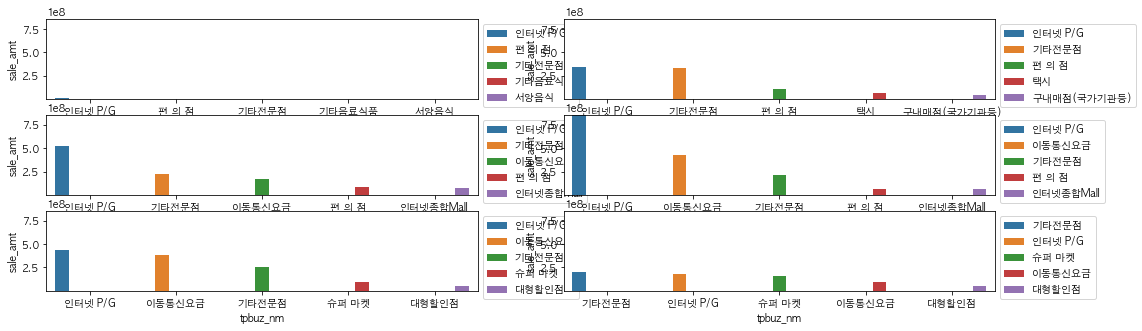

In [221]:
tmp1_1 = df2_1_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
tmp2_2 = df2_2_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
tmp3_3 = df2_3_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
tmp4_4 = df2_4_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
tmp5_5 = df2_5_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)
tmp6_6 = df2_6_sum.sort_values(by=['sale_amt'], axis=0, ascending=False).head(5)

M = max(max(tmp1_1['sale_amt']),max(tmp2_2['sale_amt']),max(tmp3_3['sale_amt']),max(tmp4_4['sale_amt']),max(tmp5_5['sale_amt']),max(tmp6_6['sale_amt']))
m = min(min(tmp1_1['sale_amt']),min(tmp2_2['sale_amt']),min(tmp3_3['sale_amt']),min(tmp4_4['sale_amt']),min(tmp5_5['sale_amt']),min(tmp6_6['sale_amt']))
    
plt.figure(figsize=(17,5))
plt.subplot(321)
plot1 = sns.barplot(data= tmp1_1 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
plt.xticks(fontsize=10)
plot1.set_ylim(m,M)
plt.legend(bbox_to_anchor=(1, 1))
    
plt.subplot(322)
plot2 = sns.barplot(data= tmp2_2 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
plt.xticks(fontsize=10)
plot2.set_ylim(m,M)
plt.legend(bbox_to_anchor=(1, 1))
    
plt.subplot(323)
plot3 = sns.barplot(data= tmp3_3 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
plt.xticks(fontsize=10)
plot3.set_ylim(m,M)
plt.legend(bbox_to_anchor=(1, 1))
    
plt.subplot(324)
plot4 = sns.barplot(data= tmp4_4 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
plt.xticks(fontsize=10)
plot4.set_ylim(m,M)
plt.legend(bbox_to_anchor=(1, 1))

plt.subplot(325)
plot5 = sns.barplot(data= tmp5_5 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
plt.xticks(fontsize=10)
plot5.set_ylim(m,M)
plt.legend(bbox_to_anchor=(1, 1))
    
plt.subplot(326)
plot6 = sns.barplot(data= tmp6_6 ,x= 'tpbuz_nm' ,y= "sale_amt", hue = 'tpbuz_nm')
plt.xticks(fontsize=10)
plot6.set_ylim(m,M)
plt.legend(bbox_to_anchor=(1, 1))   

plt.show()